In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Import libraries for Hypertuning
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

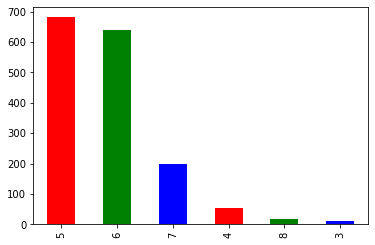

In [6]:
df.quality.value_counts().plot(kind='bar',color=['r','g','b'])

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1359, 12)

<AxesSubplot:>

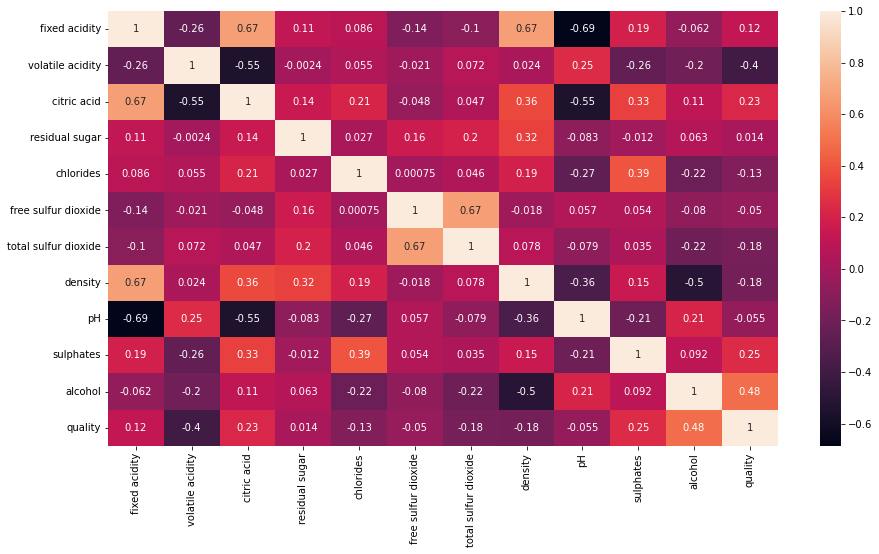

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
df['quality'] = df['quality'] -3

In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,3
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


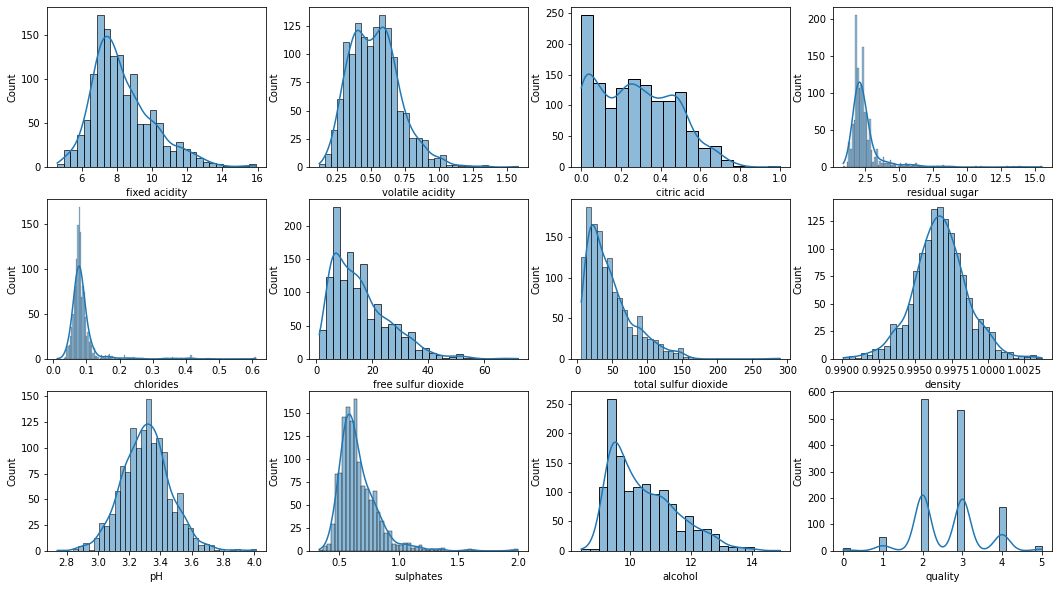

In [15]:
fig, axes = plt.subplots(3,4, figsize=(18,10))

for i,j in zip(df.columns, axes.flatten()):
    sns.histplot(df[i],ax=j,kde=True)
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sr = SMOTE(random_state=42)

In [18]:
X, Y = sr.fit_resample(df[df.columns[:-1]],df['quality'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [40]:
X_test

array([[ 0.80731999, -0.6584902 ,  0.46281619, ...,  0.15451787,
         0.84364216, -0.05995154],
       [ 0.29940106,  0.85894266, -0.71133744, ..., -0.59846127,
        -0.25542512, -0.41076731],
       [ 1.26508282, -0.09994655,  0.64396316, ...,  0.01770927,
         0.53166852, -0.56905414],
       ...,
       [-0.19369034,  0.73128445, -0.48202891, ..., -0.05570291,
        -0.56411343, -0.48024795],
       [ 1.27433077, -0.09249214,  0.65539784, ...,  0.00621742,
         0.50540921, -0.5777374 ],
       [ 0.29940106, -0.16240264,  0.04128835, ...,  0.04987177,
         0.2043401 ,  0.35127105]])

In [21]:
rab = RobustScaler()


RobustScaler()

In [25]:
imput = SimpleImputer()

In [28]:
model = LogisticRegression()

In [29]:
pipline = Pipeline(
                    steps=[
                        ("imputer", imput),
                        ("robust_scaler",rab),
                        ("logistic_model", model)
                    ])

In [30]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('robust_scaler', RobustScaler()),
                ('logistic_model', LogisticRegression())])

In [32]:
pr = pipline.predict(X_test)

In [22]:
X_train = rab.fit_transform(X_train)
X_test = rab.fit_transform(X_test)

In [23]:
X_train[0]

array([ 0.9534814 , -0.17553607, -0.19660735, 10.02960827, -0.34132314,
        0.19969107,  0.68779886,  2.1596348 , -0.81208766,  0.29661729,
       -0.76098165])

In [59]:
y_train

282     3
3181    5
2711    4
1315    2
3285    5
       ..
1095    2
1130    3
1294    3
860     3
3174    5
Name: quality, Length: 2596, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
def predict_route(fixed_acidity:float,volatile_acidity:float,citric_acid:float,residual_sugar:float,chlorides:float,free_sulfur_dioxide:float,sulfur_dioxide:float,density:float,pH:float,sulphates:float,alcohol:float,model=model):
        #get data from user csv fil
        data = [fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,sulfur_dioxide,density,pH,sulphates,alcohol]
        
        model = model
        y_pred = model.predict([data])
        df = y_pred + 3
        
        #decide how to return file to user.
        return df[0]

In [68]:
predict_route(fixed_acidity=0.9534814,volatile_acidity=-0.17553607,citric_acid=-0.19660735,residual_sugar=10.02960827,
chlorides=-0.34132314,free_sulfur_dioxide=0.19969107,sulfur_dioxide=0.68779886,density=2.1596348,pH=-0.81208766,sulphates=0.29661729,alcohol=-0.76098165,model=model)

5

In [27]:
pr = model.predict(X_test)

In [101]:
def get_classification_score(y_true, y_pred):
    try:
        confusion = pd.crosstab(y_true,y_pred)
        TP = confusion.iloc[0,0]
        FP = confusion.iloc[0,:].sum() - TP
        FN = confusion.iloc[:,0].sum() - TP
        TN = confusion.sum().sum() - TP-FP-FN
        model_precision_score = TP/(TP+FP)
        model_recall_score = TP/(TP+FN)
        model_f1_score = (2 * model_precision_score * model_recall_score)/(model_precision_score + model_recall_score)
        return model_f1_score,model_precision_score,model_recall_score
    except Exception as e:
        raise e

In [102]:
get_classification_score(y_true=y_test,y_pred=pr)

(0.8626198083067093, 0.9, 0.8282208588957055)

In [99]:
get_classification_score(y_true=y_test,y_pred=pr)

(0.8626198083067093, 0.9, 0.8282208588957055)

In [50]:
c = classification_report(y_test,pr)

In [90]:
c

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       150\n           1       0.51      0.56      0.53       126\n           2       0.60      0.49      0.54       162\n           3       0.41      0.38      0.39       143\n           4       0.54      0.54      0.54       145\n           5       0.69      0.76      0.72       140\n\n    accuracy                           0.61       866\n   macro avg       0.60      0.60      0.60       866\nweighted avg       0.60      0.61      0.60       866\n'

In [70]:
a = confusion_matrix(y_test,pr)

In [88]:
np.diag(a).sum()/a.sum().sum()

0.605080831408776

In [91]:
con = pd.crosstab(y_test,pr)

In [92]:
con

col_0,0,1,2,3,4,5
quality,,,,,,
0,135,10,0,5,0,0
1,13,70,23,17,3,0
2,14,29,79,31,5,4
3,1,23,26,54,27,12
4,0,4,3,26,79,33
5,0,0,0,0,33,107


In [103]:
TP = con.iloc[0,0]
FP = con.iloc[0,:].sum() - TP
FN = con.iloc[:,0].sum() - TP
TN = con.sum().sum() - TP-FP-FN
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = (2 * Precision * Recall)/(Precision+Recall)

In [106]:
(2*0.9*0.8282208588957055)

1.49079754601227

In [107]:
Precision+Recall

1.7282208588957055

In [108]:
1.49079754601227/1.7282208588957055

0.8626198083067093

In [109]:
F1_Score

0.8626198083067093

In [104]:
Precision

0.9

In [105]:
Recall

0.8282208588957055

In [55]:
accuracy_score(y_test,pr)

0.605080831408776

In [27]:
param = {'max_depth': 8,
 'learning_rate': 0.1709339655417761,
 'n_estimators': 998,}

In [28]:
xg = XGBClassifier(**param)
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1709339655417761,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=998,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [29]:
pr = xg.predict(X_test)
accuracy_score(y_test,pr)

0.7990762124711316

In [47]:
confusion_matrix(y_test,pr)

array([[147,   3,   0,   0,   0,   0],
       [  1, 124,   1,   0,   0,   0],
       [  4,  20,  92,  36,   9,   1],
       [  2,  11,  33,  63,  27,   7],
       [  1,   0,   1,  11, 129,   3],
       [  0,   0,   0,   0,   3, 137]], dtype=int64)

In [51]:
l = [7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4]
a = [7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8]
b = [11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8]
c = [0.80731999, -0.6584902 ,  0.46281619,  0.35459844,  0.19714423,
        0.33489809,  0.18092002,  1.19239607,  0.15451787,  0.84364216,
       -0.05995154]

In [50]:
X_test[0]

array([ 0.80731999, -0.6584902 ,  0.46281619,  0.35459844,  0.19714423,
        0.33489809,  0.18092002,  1.19239607,  0.15451787,  0.84364216,
       -0.05995154])

In [46]:
xg.predict([b])

array([5], dtype=int64)

In [89]:
def train_xgboost_model(X_train, y_train, X_val, y_val, xgb_params_best):
    """
    Trains a XGBoost model with the given training and validation data.
    Returns the validation predictions, score and trained model.
    """
    xgb_model = XGBClassifier(**xgb_params_best)
    xgb_model.fit(X_train, y_train, eval_set= [(X_val,y_val)], early_stopping_rounds=200, verbose=500)
    xgb_pred_val = xgb_model.predict(X_val)
    xgb_score = cohen_kappa_score(y_val, xgb_pred_val, weights='quadratic')
    return xgb_pred_val, xgb_score, xgb_model

In [82]:
features = df.columns[:-1]
target = 'qualitty' 

In [90]:
def objective(trial):
    
    num_classes = 6
    
    xgb_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'objective': 'multi:softmax',
        'num_class': num_classes,
        "tree_method":"hist",
        'random_state': 42
    }

    n_cv = trial.suggest_int('n_cv', 3, 10)
    cv = StratifiedKFold(n_cv, shuffle=True, random_state=42)
    fold_scores = []
    for i, (train_idx, val_idx) in enumerate(cv.split(X[features], X[target])):
        X_train, y_train = X.loc[train_idx, features], X.loc[train_idx, target]
        X_val, y_val = X.loc[val_idx, features], X.loc[val_idx, target]

        _, xgb_score, xgb_model = train_xgboost_model(X_train, y_train, X_val, y_val, xgb_params)
        fold_scores.append(xgb_score)
        
    return np.mean(fold_scores)



In [91]:
study = optuna.create_study(direction='maximize', sampler = TPESampler())
study.optimize(objective, n_trials=100)

[I 2023-09-03 20:15:55,957] A new study created in memory with name: no-name-5c93d3a1-8bac-42d8-b219-684b21c0ce85


[0]	validation_0-mlogloss:1.72328


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48023
[534]	validation_0-mlogloss:0.48289
[0]	validation_0-mlogloss:1.72398


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48592
[531]	validation_0-mlogloss:0.48902
[0]	validation_0-mlogloss:1.72310


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.45612
[566]	validation_0-mlogloss:0.45981
[0]	validation_0-mlogloss:1.72327


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.42276
[597]	validation_0-mlogloss:0.42733


[I 2023-09-03 20:16:14,709] Trial 0 finished with value: 0.9547759183801313 and parameters: {'max_depth': 7, 'learning_rate': 0.04638406943159274, 'n_estimators': 662, 'n_cv': 4}. Best is trial 0 with value: 0.9547759183801313.


[0]	validation_0-mlogloss:1.44833


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[119]	validation_0-mlogloss:0.47511
[0]	validation_0-mlogloss:1.45545


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[119]	validation_0-mlogloss:0.50886
[0]	validation_0-mlogloss:1.44509


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[119]	validation_0-mlogloss:0.47864
[0]	validation_0-mlogloss:1.44827


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[119]	validation_0-mlogloss:0.42385


[I 2023-09-03 20:16:18,083] Trial 1 finished with value: 0.9524182125519769 and parameters: {'max_depth': 5, 'learning_rate': 0.2951358435921284, 'n_estimators': 120, 'n_cv': 4}. Best is trial 0 with value: 0.9547759183801313.


[0]	validation_0-mlogloss:1.66408


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.47416
[0]	validation_0-mlogloss:1.66299


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.41648
[0]	validation_0-mlogloss:1.66452


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.51617
[0]	validation_0-mlogloss:1.67115


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.46118
[0]	validation_0-mlogloss:1.66414


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.45953
[0]	validation_0-mlogloss:1.66686


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.50298
[0]	validation_0-mlogloss:1.66695


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.44593
[0]	validation_0-mlogloss:1.65618


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-mlogloss:0.42737


[I 2023-09-03 20:16:27,409] Trial 2 finished with value: 0.9523424904901077 and parameters: {'max_depth': 4, 'learning_rate': 0.11411244169566578, 'n_estimators': 208, 'n_cv': 8}. Best is trial 0 with value: 0.9547759183801313.


[0]	validation_0-mlogloss:1.64367


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48856
[602]	validation_0-mlogloss:0.49732
[0]	validation_0-mlogloss:1.64657


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.51761
[519]	validation_0-mlogloss:0.51927
[0]	validation_0-mlogloss:1.64101


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48929
[647]	validation_0-mlogloss:0.50425
[0]	validation_0-mlogloss:1.63895


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44332
[609]	validation_0-mlogloss:0.45360


[I 2023-09-03 20:16:36,497] Trial 3 finished with value: 0.9533737736900608 and parameters: {'max_depth': 3, 'learning_rate': 0.16474087964521947, 'n_estimators': 864, 'n_cv': 4}. Best is trial 0 with value: 0.9547759183801313.


[0]	validation_0-mlogloss:1.56478


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.49519
[0]	validation_0-mlogloss:1.56670


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.51623
[0]	validation_0-mlogloss:1.55287


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[292]	validation_0-mlogloss:0.47572
[0]	validation_0-mlogloss:1.57396


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.50538
[0]	validation_0-mlogloss:1.57239


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.57174
[0]	validation_0-mlogloss:1.55792


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[295]	validation_0-mlogloss:0.42165
[0]	validation_0-mlogloss:1.57420


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[283]	validation_0-mlogloss:0.58120
[0]	validation_0-mlogloss:1.56869


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.44917
[0]	validation_0-mlogloss:1.57174


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[282]	validation_0-mlogloss:0.54223
[0]	validation_0-mlogloss:1.55139


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[335]	validation_0-mlogloss:0.37796


[I 2023-09-03 20:17:01,627] Trial 4 finished with value: 0.9563123225100082 and parameters: {'max_depth': 10, 'learning_rate': 0.14211720271459063, 'n_estimators': 787, 'n_cv': 10}. Best is trial 4 with value: 0.9563123225100082.


[0]	validation_0-mlogloss:1.38806


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[237]	validation_0-mlogloss:0.53909
[0]	validation_0-mlogloss:1.40401


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[232]	validation_0-mlogloss:0.63170
[0]	validation_0-mlogloss:1.40022


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[243]	validation_0-mlogloss:0.51728


[I 2023-09-03 20:17:06,479] Trial 5 finished with value: 0.9479580266005607 and parameters: {'max_depth': 10, 'learning_rate': 0.27872341214173085, 'n_estimators': 669, 'n_cv': 3}. Best is trial 4 with value: 0.9563123225100082.


[0]	validation_0-mlogloss:1.40676


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-mlogloss:0.59357
[0]	validation_0-mlogloss:1.38839


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.47299
[0]	validation_0-mlogloss:1.38456


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[236]	validation_0-mlogloss:0.58684
[0]	validation_0-mlogloss:1.37073


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[237]	validation_0-mlogloss:0.53406
[0]	validation_0-mlogloss:1.38875


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[285]	validation_0-mlogloss:0.52081
[0]	validation_0-mlogloss:1.38106


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[235]	validation_0-mlogloss:0.48727


[I 2023-09-03 20:17:17,906] Trial 6 finished with value: 0.9519019955875733 and parameters: {'max_depth': 9, 'learning_rate': 0.28024218452016836, 'n_estimators': 768, 'n_cv': 6}. Best is trial 4 with value: 0.9563123225100082.


[0]	validation_0-mlogloss:1.63813


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.52254
[0]	validation_0-mlogloss:1.63438


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[415]	validation_0-mlogloss:0.44305
[0]	validation_0-mlogloss:1.63402


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[376]	validation_0-mlogloss:0.48584
[0]	validation_0-mlogloss:1.62599


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[421]	validation_0-mlogloss:0.49681
[0]	validation_0-mlogloss:1.62966


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[421]	validation_0-mlogloss:0.45983
[0]	validation_0-mlogloss:1.62982


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[429]	validation_0-mlogloss:0.44708


[I 2023-09-03 20:17:32,310] Trial 7 finished with value: 0.9555738380394766 and parameters: {'max_depth': 5, 'learning_rate': 0.1270258817698544, 'n_estimators': 953, 'n_cv': 6}. Best is trial 4 with value: 0.9563123225100082.


[0]	validation_0-mlogloss:1.69205


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[407]	validation_0-mlogloss:0.45273
[0]	validation_0-mlogloss:1.69439


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[428]	validation_0-mlogloss:0.48144
[0]	validation_0-mlogloss:1.68900


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[439]	validation_0-mlogloss:0.42960
[0]	validation_0-mlogloss:1.69711


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46017
[503]	validation_0-mlogloss:0.46035
[0]	validation_0-mlogloss:1.69440


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[403]	validation_0-mlogloss:0.50805
[0]	validation_0-mlogloss:1.68957


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.42777
[514]	validation_0-mlogloss:0.42982
[0]	validation_0-mlogloss:1.69684


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[376]	validation_0-mlogloss:0.56047
[0]	validation_0-mlogloss:1.69668


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[495]	validation_0-mlogloss:0.42693
[0]	validation_0-mlogloss:1.69576


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[438]	validation_0-mlogloss:0.48606
[0]	validation_0-mlogloss:1.68687


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[493]	validation_0-mlogloss:0.34090


[I 2023-09-03 20:18:08,053] Trial 8 finished with value: 0.9574384933179804 and parameters: {'max_depth': 7, 'learning_rate': 0.06552120133761653, 'n_estimators': 996, 'n_cv': 10}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.37456


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[231]	validation_0-mlogloss:0.51853
[0]	validation_0-mlogloss:1.37199


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-mlogloss:0.48729
[0]	validation_0-mlogloss:1.38698


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[236]	validation_0-mlogloss:0.58634
[0]	validation_0-mlogloss:1.38589


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-mlogloss:0.53460
[0]	validation_0-mlogloss:1.37783


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[228]	validation_0-mlogloss:0.60201
[0]	validation_0-mlogloss:1.37546


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[240]	validation_0-mlogloss:0.51609
[0]	validation_0-mlogloss:1.39368


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[244]	validation_0-mlogloss:0.51013
[0]	validation_0-mlogloss:1.39113


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[237]	validation_0-mlogloss:0.53760
[0]	validation_0-mlogloss:1.37237


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[252]	validation_0-mlogloss:0.40946


[I 2023-09-03 20:18:22,334] Trial 9 finished with value: 0.9533522625760386 and parameters: {'max_depth': 10, 'learning_rate': 0.27314736268869755, 'n_estimators': 420, 'n_cv': 9}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.76373


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.51126
[0]	validation_0-mlogloss:1.76370


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.46048
[0]	validation_0-mlogloss:1.76460


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.52486
[0]	validation_0-mlogloss:1.76334


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.48826
[0]	validation_0-mlogloss:1.76353


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.48480
[0]	validation_0-mlogloss:1.76488


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.51293
[0]	validation_0-mlogloss:1.76426


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.49641
[0]	validation_0-mlogloss:1.76276


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.41236


[I 2023-09-03 20:18:53,986] Trial 10 finished with value: 0.949586532137322 and parameters: {'max_depth': 7, 'learning_rate': 0.01804495030467118, 'n_estimators': 389, 'n_cv': 8}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.50986


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[277]	validation_0-mlogloss:0.52162
[0]	validation_0-mlogloss:1.51425


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[259]	validation_0-mlogloss:0.51403
[0]	validation_0-mlogloss:1.49870


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.46172
[0]	validation_0-mlogloss:1.52273


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.52842
[0]	validation_0-mlogloss:1.51264


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[252]	validation_0-mlogloss:0.58482
[0]	validation_0-mlogloss:1.50027


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-mlogloss:0.43977
[0]	validation_0-mlogloss:1.52595


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-mlogloss:0.61969
[0]	validation_0-mlogloss:1.52077


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-mlogloss:0.44642
[0]	validation_0-mlogloss:1.52018


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.55098
[0]	validation_0-mlogloss:1.49149


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[306]	validation_0-mlogloss:0.36380


[I 2023-09-03 20:19:13,115] Trial 11 finished with value: 0.9569270499195008 and parameters: {'max_depth': 8, 'learning_rate': 0.18704164653750432, 'n_estimators': 988, 'n_cv': 10}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.48500


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.51659
[0]	validation_0-mlogloss:1.48983


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.52651
[0]	validation_0-mlogloss:1.47285


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.46109
[0]	validation_0-mlogloss:1.49910


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.51654
[0]	validation_0-mlogloss:1.48808


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.57600
[0]	validation_0-mlogloss:1.47460


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.44903
[0]	validation_0-mlogloss:1.50261


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.59976
[0]	validation_0-mlogloss:1.49693


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.45661
[0]	validation_0-mlogloss:1.49636


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.54554
[0]	validation_0-mlogloss:1.46498


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[298]	validation_0-mlogloss:0.37268


[I 2023-09-03 20:19:32,509] Trial 12 finished with value: 0.9569117322892697 and parameters: {'max_depth': 8, 'learning_rate': 0.20499056148283945, 'n_estimators': 982, 'n_cv': 10}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.65963


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[387]	validation_0-mlogloss:0.50011
[0]	validation_0-mlogloss:1.65930


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[422]	validation_0-mlogloss:0.41117
[0]	validation_0-mlogloss:1.66361


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[372]	validation_0-mlogloss:0.49829
[0]	validation_0-mlogloss:1.65754


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.48202
[0]	validation_0-mlogloss:1.65861


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[332]	validation_0-mlogloss:0.46777
[0]	validation_0-mlogloss:1.66503


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[419]	validation_0-mlogloss:0.49366
[0]	validation_0-mlogloss:1.66204


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[389]	validation_0-mlogloss:0.47494
[0]	validation_0-mlogloss:1.65475


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[376]	validation_0-mlogloss:0.38618


[I 2023-09-03 20:19:56,196] Trial 13 finished with value: 0.9559827099976075 and parameters: {'max_depth': 7, 'learning_rate': 0.08709849458623209, 'n_estimators': 989, 'n_cv': 8}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.48601


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.52184
[0]	validation_0-mlogloss:1.49082


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.54153
[0]	validation_0-mlogloss:1.47390


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.46883
[0]	validation_0-mlogloss:1.50006


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[253]	validation_0-mlogloss:0.52117
[0]	validation_0-mlogloss:1.48907


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-mlogloss:0.59961
[0]	validation_0-mlogloss:1.47564


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.42094
[0]	validation_0-mlogloss:1.50355


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-mlogloss:0.60141
[0]	validation_0-mlogloss:1.49789


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[253]	validation_0-mlogloss:0.45662
[0]	validation_0-mlogloss:1.49732


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.54523
[0]	validation_0-mlogloss:1.46605


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[301]	validation_0-mlogloss:0.37343


[I 2023-09-03 20:20:14,136] Trial 14 finished with value: 0.9561208806586794 and parameters: {'max_depth': 8, 'learning_rate': 0.20425838139310482, 'n_estimators': 847, 'n_cv': 10}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.65869


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47503
[535]	validation_0-mlogloss:0.47231
[0]	validation_0-mlogloss:1.65963


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.49938
[535]	validation_0-mlogloss:0.49749
[0]	validation_0-mlogloss:1.65210


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.53073
[535]	validation_0-mlogloss:0.52929
[0]	validation_0-mlogloss:1.66293


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47468
[535]	validation_0-mlogloss:0.46979
[0]	validation_0-mlogloss:1.66457


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.53273
[535]	validation_0-mlogloss:0.52529
[0]	validation_0-mlogloss:1.65958


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.50985
[535]	validation_0-mlogloss:0.50949
[0]	validation_0-mlogloss:1.65640


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.51365
[535]	validation_0-mlogloss:0.50971
[0]	validation_0-mlogloss:1.66012


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.45605
[535]	validation_0-mlogloss:0.45091
[0]	validation_0-mlogloss:1.65157


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44222
[535]	validation_0-mlogloss:0.44053


[I 2023-09-03 20:20:27,672] Trial 15 finished with value: 0.9489647114195725 and parameters: {'max_depth': 2, 'learning_rate': 0.18822377099851062, 'n_estimators': 536, 'n_cv': 9}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.68801


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[421]	validation_0-mlogloss:0.50028
[0]	validation_0-mlogloss:1.68534


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.40620
[0]	validation_0-mlogloss:1.68802


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[430]	validation_0-mlogloss:0.48095
[0]	validation_0-mlogloss:1.68768


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[425]	validation_0-mlogloss:0.49922
[0]	validation_0-mlogloss:1.68958


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[406]	validation_0-mlogloss:0.50425
[0]	validation_0-mlogloss:1.68651


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[451]	validation_0-mlogloss:0.45322
[0]	validation_0-mlogloss:1.68566


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.40524
[539]	validation_0-mlogloss:0.41047


[I 2023-09-03 20:20:48,913] Trial 16 finished with value: 0.9531785838138295 and parameters: {'max_depth': 6, 'learning_rate': 0.07389147418169038, 'n_estimators': 661, 'n_cv': 7}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.44559


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.53215
[0]	validation_0-mlogloss:1.44849


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-mlogloss:0.47535
[0]	validation_0-mlogloss:1.45494


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[254]	validation_0-mlogloss:0.55638
[0]	validation_0-mlogloss:1.45060


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.51236
[0]	validation_0-mlogloss:1.44241


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[235]	validation_0-mlogloss:0.59400
[0]	validation_0-mlogloss:1.44091


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.54063
[0]	validation_0-mlogloss:1.45568


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.51216
[0]	validation_0-mlogloss:1.45674


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.52228
[0]	validation_0-mlogloss:1.44143


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[272]	validation_0-mlogloss:0.38847


[I 2023-09-03 20:21:04,060] Trial 17 finished with value: 0.9544758946804599 and parameters: {'max_depth': 8, 'learning_rate': 0.23180228466137082, 'n_estimators': 881, 'n_cv': 9}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.65574


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[372]	validation_0-mlogloss:0.51636
[0]	validation_0-mlogloss:1.65219


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[455]	validation_0-mlogloss:0.41060
[0]	validation_0-mlogloss:1.65574


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[376]	validation_0-mlogloss:0.48746
[0]	validation_0-mlogloss:1.65529


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[352]	validation_0-mlogloss:0.48896
[0]	validation_0-mlogloss:1.65779


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.51413
[0]	validation_0-mlogloss:1.65374


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[441]	validation_0-mlogloss:0.45162
[0]	validation_0-mlogloss:1.65260


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[473]	validation_0-mlogloss:0.41697


[I 2023-09-03 20:21:22,442] Trial 18 finished with value: 0.95528783303831 and parameters: {'max_depth': 6, 'learning_rate': 0.09768276630222836, 'n_estimators': 745, 'n_cv': 7}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.43261


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.50817
[0]	validation_0-mlogloss:1.43553


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[254]	validation_0-mlogloss:0.54829
[0]	validation_0-mlogloss:1.41482


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[247]	validation_0-mlogloss:0.47135
[0]	validation_0-mlogloss:1.44561


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-mlogloss:0.51633
[0]	validation_0-mlogloss:1.44310


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[232]	validation_0-mlogloss:0.59815
[0]	validation_0-mlogloss:1.42450


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.45396
[0]	validation_0-mlogloss:1.44969


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.62190
[0]	validation_0-mlogloss:1.44635


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.45931
[0]	validation_0-mlogloss:1.44410


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[246]	validation_0-mlogloss:0.56673
[0]	validation_0-mlogloss:1.41113


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.39022


[I 2023-09-03 20:21:40,660] Trial 19 finished with value: 0.9542336340186216 and parameters: {'max_depth': 9, 'learning_rate': 0.23613210514586963, 'n_estimators': 567, 'n_cv': 10}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.77515


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.57443
[913]	validation_0-mlogloss:0.47910
[0]	validation_0-mlogloss:1.77524


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.56799
[913]	validation_0-mlogloss:0.47143
[0]	validation_0-mlogloss:1.77515


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.62561
[913]	validation_0-mlogloss:0.54057
[0]	validation_0-mlogloss:1.77499


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.56375
[913]	validation_0-mlogloss:0.47081
[0]	validation_0-mlogloss:1.77487


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.62691
[913]	validation_0-mlogloss:0.53066
[0]	validation_0-mlogloss:1.77452


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.59062
[913]	validation_0-mlogloss:0.50589
[0]	validation_0-mlogloss:1.77497


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.57805
[913]	validation_0-mlogloss:0.49081
[0]	validation_0-mlogloss:1.77557


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.56756
[913]	validation_0-mlogloss:0.46225
[0]	validation_0-mlogloss:1.77425


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.51332
[913]	validation_0-mlogloss:0.41921


[I 2023-09-03 20:22:41,106] Trial 20 finished with value: 0.9499642746564033 and parameters: {'max_depth': 5, 'learning_rate': 0.012757841354002764, 'n_estimators': 914, 'n_cv': 9}. Best is trial 8 with value: 0.9574384933179804.


[0]	validation_0-mlogloss:1.53251


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.50768
[0]	validation_0-mlogloss:1.53652


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[285]	validation_0-mlogloss:0.52203
[0]	validation_0-mlogloss:1.52225


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.46428
[0]	validation_0-mlogloss:1.54429


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[287]	validation_0-mlogloss:0.51722
[0]	validation_0-mlogloss:1.53505


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.56455
[0]	validation_0-mlogloss:1.52367


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[307]	validation_0-mlogloss:0.41821
[0]	validation_0-mlogloss:1.54724


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.59833
[0]	validation_0-mlogloss:1.54251


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[275]	validation_0-mlogloss:0.45899
[0]	validation_0-mlogloss:1.54192


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[294]	validation_0-mlogloss:0.54795
[0]	validation_0-mlogloss:1.51565


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[339]	validation_0-mlogloss:0.36247


[I 2023-09-03 20:23:05,334] Trial 21 finished with value: 0.9586330989974524 and parameters: {'max_depth': 8, 'learning_rate': 0.1709339655417761, 'n_estimators': 998, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.53699


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.50760
[0]	validation_0-mlogloss:1.53894


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.51836
[0]	validation_0-mlogloss:1.52450


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.48246
[0]	validation_0-mlogloss:1.54609


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.52369
[0]	validation_0-mlogloss:1.54445


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.57542
[0]	validation_0-mlogloss:1.53111


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[297]	validation_0-mlogloss:0.42669
[0]	validation_0-mlogloss:1.54894


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[252]	validation_0-mlogloss:0.58058
[0]	validation_0-mlogloss:1.54674


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.45725
[0]	validation_0-mlogloss:1.54480


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.56484
[0]	validation_0-mlogloss:1.52187


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.35765


[I 2023-09-03 20:23:28,041] Trial 22 finished with value: 0.9556215796249699 and parameters: {'max_depth': 9, 'learning_rate': 0.16255401939200143, 'n_estimators': 991, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.70132


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[458]	validation_0-mlogloss:0.46412
[0]	validation_0-mlogloss:1.70239


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[493]	validation_0-mlogloss:0.44227
[0]	validation_0-mlogloss:1.70374


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[411]	validation_0-mlogloss:0.50929
[0]	validation_0-mlogloss:1.70225


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[471]	validation_0-mlogloss:0.46705
[0]	validation_0-mlogloss:1.70008


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[418]	validation_0-mlogloss:0.52619
[0]	validation_0-mlogloss:1.69769


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[470]	validation_0-mlogloss:0.47413
[0]	validation_0-mlogloss:1.70371


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.45164
[0]	validation_0-mlogloss:1.70280


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44734
[510]	validation_0-mlogloss:0.44867
[0]	validation_0-mlogloss:1.69961


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.35784
[542]	validation_0-mlogloss:0.36184


[I 2023-09-03 20:24:04,970] Trial 23 finished with value: 0.955313997214044 and parameters: {'max_depth': 7, 'learning_rate': 0.059739423990025076, 'n_estimators': 830, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.52641


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.53733
[0]	validation_0-mlogloss:1.52356


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[317]	validation_0-mlogloss:0.42971
[0]	validation_0-mlogloss:1.53767


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.54282
[0]	validation_0-mlogloss:1.52906


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.52254
[0]	validation_0-mlogloss:1.52424


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.49714
[0]	validation_0-mlogloss:1.53990


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.51420
[0]	validation_0-mlogloss:1.52880


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.49755
[0]	validation_0-mlogloss:1.51392


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[282]	validation_0-mlogloss:0.41224


[I 2023-09-03 20:24:21,102] Trial 24 finished with value: 0.9559336691851348 and parameters: {'max_depth': 8, 'learning_rate': 0.17307351894232495, 'n_estimators': 909, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.56471


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-mlogloss:0.50151
[0]	validation_0-mlogloss:1.56643


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.50051
[0]	validation_0-mlogloss:1.55361


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.46279
[0]	validation_0-mlogloss:1.57280


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[294]	validation_0-mlogloss:0.48774
[0]	validation_0-mlogloss:1.57136


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.56108
[0]	validation_0-mlogloss:1.55945


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[295]	validation_0-mlogloss:0.42273
[0]	validation_0-mlogloss:1.57532


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.58227
[0]	validation_0-mlogloss:1.57340


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.44069
[0]	validation_0-mlogloss:1.57160


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.54857
[0]	validation_0-mlogloss:1.55126


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[316]	validation_0-mlogloss:0.36638


[I 2023-09-03 20:24:43,033] Trial 25 finished with value: 0.9560740900231369 and parameters: {'max_depth': 9, 'learning_rate': 0.14383151503950514, 'n_estimators': 928, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.48928


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.50570
[0]	validation_0-mlogloss:1.49305


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[299]	validation_0-mlogloss:0.46799
[0]	validation_0-mlogloss:1.49287


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[282]	validation_0-mlogloss:0.55888
[0]	validation_0-mlogloss:1.49082


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.51124
[0]	validation_0-mlogloss:1.48675


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-mlogloss:0.58231
[0]	validation_0-mlogloss:1.47745


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.51267
[0]	validation_0-mlogloss:1.49217


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.50884
[0]	validation_0-mlogloss:1.49636


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[308]	validation_0-mlogloss:0.46201
[0]	validation_0-mlogloss:1.47920


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[314]	validation_0-mlogloss:0.39804


[I 2023-09-03 20:24:58,154] Trial 26 finished with value: 0.9574571924632372 and parameters: {'max_depth': 6, 'learning_rate': 0.2273999284948591, 'n_estimators': 712, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.47411


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.50717
[0]	validation_0-mlogloss:1.47802


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.48822
[0]	validation_0-mlogloss:1.47794


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.56219
[0]	validation_0-mlogloss:1.47574


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.49642
[0]	validation_0-mlogloss:1.47147


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.59032
[0]	validation_0-mlogloss:1.46171


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.53129
[0]	validation_0-mlogloss:1.47714


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.50283
[0]	validation_0-mlogloss:1.48158


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.44592
[0]	validation_0-mlogloss:1.46348


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[293]	validation_0-mlogloss:0.40901


[I 2023-09-03 20:25:12,451] Trial 27 finished with value: 0.9568136462155166 and parameters: {'max_depth': 6, 'learning_rate': 0.24003123980376667, 'n_estimators': 547, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.56488


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[332]	validation_0-mlogloss:0.51411
[0]	validation_0-mlogloss:1.55148


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[429]	validation_0-mlogloss:0.42200
[0]	validation_0-mlogloss:1.56748


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[366]	validation_0-mlogloss:0.48292
[0]	validation_0-mlogloss:1.55688


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[333]	validation_0-mlogloss:0.53769
[0]	validation_0-mlogloss:1.57552


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[349]	validation_0-mlogloss:0.56083
[0]	validation_0-mlogloss:1.55999


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[341]	validation_0-mlogloss:0.48948
[0]	validation_0-mlogloss:1.55358


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[424]	validation_0-mlogloss:0.43526


[I 2023-09-03 20:25:24,139] Trial 28 finished with value: 0.9543073934340204 and parameters: {'max_depth': 4, 'learning_rate': 0.21524095083999872, 'n_estimators': 710, 'n_cv': 7}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.72779


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.45824
[0]	validation_0-mlogloss:1.72768


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.40324
[0]	validation_0-mlogloss:1.72976


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.48762
[0]	validation_0-mlogloss:1.72685


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.44344
[0]	validation_0-mlogloss:1.72731


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.45111
[0]	validation_0-mlogloss:1.73041


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.46632
[0]	validation_0-mlogloss:1.72898


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.44997
[0]	validation_0-mlogloss:1.72552


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.36179


[I 2023-09-03 20:25:54,391] Trial 29 finished with value: 0.9561761079605933 and parameters: {'max_depth': 7, 'learning_rate': 0.04150903064600951, 'n_estimators': 400, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.44577


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.55373
[0]	validation_0-mlogloss:1.43830


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[259]	validation_0-mlogloss:0.50633
[0]	validation_0-mlogloss:1.42597


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-mlogloss:0.56149
[0]	validation_0-mlogloss:1.45491


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.58995
[0]	validation_0-mlogloss:1.43610


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.47046


[I 2023-09-03 20:26:05,779] Trial 30 finished with value: 0.9534168902479498 and parameters: {'max_depth': 7, 'learning_rate': 0.25242912444246535, 'n_estimators': 811, 'n_cv': 5}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.49669


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[282]	validation_0-mlogloss:0.50307
[0]	validation_0-mlogloss:1.50132


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.51127
[0]	validation_0-mlogloss:1.48501


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.44700
[0]	validation_0-mlogloss:1.51021


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.51762
[0]	validation_0-mlogloss:1.49963


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[259]	validation_0-mlogloss:0.58020
[0]	validation_0-mlogloss:1.48667


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.41329
[0]	validation_0-mlogloss:1.51359


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.61741
[0]	validation_0-mlogloss:1.50814


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.46284
[0]	validation_0-mlogloss:1.50756


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.54516
[0]	validation_0-mlogloss:1.47745


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[289]	validation_0-mlogloss:0.36922


[I 2023-09-03 20:26:29,636] Trial 31 finished with value: 0.9569585388281718 and parameters: {'max_depth': 8, 'learning_rate': 0.1965108220428365, 'n_estimators': 925, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.54842


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.47271
[0]	validation_0-mlogloss:1.55161


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[326]	validation_0-mlogloss:0.45830
[0]	validation_0-mlogloss:1.55115


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[301]	validation_0-mlogloss:0.54684
[0]	validation_0-mlogloss:1.54966


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.49291
[0]	validation_0-mlogloss:1.54637


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[295]	validation_0-mlogloss:0.57122
[0]	validation_0-mlogloss:1.53888


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-mlogloss:0.50314
[0]	validation_0-mlogloss:1.55079


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[313]	validation_0-mlogloss:0.49648
[0]	validation_0-mlogloss:1.55403


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.44815
[0]	validation_0-mlogloss:1.54047


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[346]	validation_0-mlogloss:0.38077


[I 2023-09-03 20:26:52,319] Trial 32 finished with value: 0.9565610985678377 and parameters: {'max_depth': 6, 'learning_rate': 0.1795288877451049, 'n_estimators': 905, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.61760


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[334]	validation_0-mlogloss:0.47974
[0]	validation_0-mlogloss:1.62177


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-mlogloss:0.49174
[0]	validation_0-mlogloss:1.61221


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[339]	validation_0-mlogloss:0.43482
[0]	validation_0-mlogloss:1.62648


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[323]	validation_0-mlogloss:0.48289
[0]	validation_0-mlogloss:1.62181


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[312]	validation_0-mlogloss:0.52755
[0]	validation_0-mlogloss:1.61329


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[307]	validation_0-mlogloss:0.42757
[0]	validation_0-mlogloss:1.62609


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[314]	validation_0-mlogloss:0.59562
[0]	validation_0-mlogloss:1.62581


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[375]	validation_0-mlogloss:0.44373
[0]	validation_0-mlogloss:1.62423


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[337]	validation_0-mlogloss:0.49145
[0]	validation_0-mlogloss:1.60841


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[363]	validation_0-mlogloss:0.34606


[I 2023-09-03 20:27:21,658] Trial 33 finished with value: 0.9573447119160576 and parameters: {'max_depth': 7, 'learning_rate': 0.11646054324652771, 'n_estimators': 614, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.64372


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[475]	validation_0-mlogloss:0.45350
[0]	validation_0-mlogloss:1.64828


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[403]	validation_0-mlogloss:0.46575
[0]	validation_0-mlogloss:1.63939


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[475]	validation_0-mlogloss:0.43345
[0]	validation_0-mlogloss:1.65081


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[404]	validation_0-mlogloss:0.46749
[0]	validation_0-mlogloss:1.65113


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[417]	validation_0-mlogloss:0.49937
[0]	validation_0-mlogloss:1.64040


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[437]	validation_0-mlogloss:0.46273
[0]	validation_0-mlogloss:1.65236


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[404]	validation_0-mlogloss:0.58176
[0]	validation_0-mlogloss:1.64934


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[439]	validation_0-mlogloss:0.45510
[0]	validation_0-mlogloss:1.65055


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[416]	validation_0-mlogloss:0.46778
[0]	validation_0-mlogloss:1.63111


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[475]	validation_0-mlogloss:0.35964


[I 2023-09-03 20:27:50,794] Trial 34 finished with value: 0.9563536668907565 and parameters: {'max_depth': 5, 'learning_rate': 0.1164537390111255, 'n_estimators': 476, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.68795


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.44084
[0]	validation_0-mlogloss:1.68468


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.44632
[0]	validation_0-mlogloss:1.68596


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.51776
[0]	validation_0-mlogloss:1.68455


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.42049
[0]	validation_0-mlogloss:1.68616


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.48877
[0]	validation_0-mlogloss:1.68401


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.48483
[0]	validation_0-mlogloss:1.68384


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.46235
[0]	validation_0-mlogloss:1.68628


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.43181
[0]	validation_0-mlogloss:1.67977


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.40175


[I 2023-09-03 20:28:06,077] Trial 35 finished with value: 0.954312556518033 and parameters: {'max_depth': 4, 'learning_rate': 0.09443808135282687, 'n_estimators': 277, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.73106


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44916
[608]	validation_0-mlogloss:0.45419
[0]	validation_0-mlogloss:1.73248


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46831
[567]	validation_0-mlogloss:0.46932
[0]	validation_0-mlogloss:1.72922


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.40248
[608]	validation_0-mlogloss:0.40732
[0]	validation_0-mlogloss:1.73414


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46922
[579]	validation_0-mlogloss:0.47161
[0]	validation_0-mlogloss:1.73248


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.49663
[523]	validation_0-mlogloss:0.49937
[0]	validation_0-mlogloss:1.72955


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.41485
[543]	validation_0-mlogloss:0.41462
[0]	validation_0-mlogloss:1.73396


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.54194
[541]	validation_0-mlogloss:0.54733
[0]	validation_0-mlogloss:1.73386


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.40994
[608]	validation_0-mlogloss:0.41654
[0]	validation_0-mlogloss:1.73330


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.45816
[608]	validation_0-mlogloss:0.46937
[0]	validation_0-mlogloss:1.72794


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.32769
[608]	validation_0-mlogloss:0.32792


[I 2023-09-03 20:29:05,181] Trial 36 finished with value: 0.9577178618311806 and parameters: {'max_depth': 7, 'learning_rate': 0.03954671691115783, 'n_estimators': 609, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.72089


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46131
[559]	validation_0-mlogloss:0.46434
[0]	validation_0-mlogloss:1.72140


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.38994
[625]	validation_0-mlogloss:0.39316
[0]	validation_0-mlogloss:1.72415


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48988
[567]	validation_0-mlogloss:0.49419
[0]	validation_0-mlogloss:1.72344


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44264
[542]	validation_0-mlogloss:0.44502
[0]	validation_0-mlogloss:1.72158


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44709
[616]	validation_0-mlogloss:0.45408
[0]	validation_0-mlogloss:1.72342


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46437
[575]	validation_0-mlogloss:0.46953
[0]	validation_0-mlogloss:1.72328


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.42471
[705]	validation_0-mlogloss:0.43530
[0]	validation_0-mlogloss:1.71986


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.37488
[726]	validation_0-mlogloss:0.38111


[I 2023-09-03 20:29:47,203] Trial 37 finished with value: 0.9566367328704654 and parameters: {'max_depth': 6, 'learning_rate': 0.048337714337863255, 'n_estimators': 727, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.74795


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46786
[628]	validation_0-mlogloss:0.46769
[0]	validation_0-mlogloss:1.74821


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.51725
[628]	validation_0-mlogloss:0.52075
[0]	validation_0-mlogloss:1.74959


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44742
[628]	validation_0-mlogloss:0.44909


[I 2023-09-03 20:30:03,934] Trial 38 finished with value: 0.9504627563948042 and parameters: {'max_depth': 6, 'learning_rate': 0.03136036961240559, 'n_estimators': 629, 'n_cv': 3}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.62574


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[121]	validation_0-mlogloss:0.47119
[0]	validation_0-mlogloss:1.62072


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[121]	validation_0-mlogloss:0.46637
[0]	validation_0-mlogloss:1.62098


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[121]	validation_0-mlogloss:0.47288
[0]	validation_0-mlogloss:1.62830


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[121]	validation_0-mlogloss:0.49334
[0]	validation_0-mlogloss:1.62504


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[121]	validation_0-mlogloss:0.43216


[I 2023-09-03 20:30:08,873] Trial 39 finished with value: 0.9510322405542786 and parameters: {'max_depth': 5, 'learning_rate': 0.1335119517399702, 'n_estimators': 122, 'n_cv': 5}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.68768


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[429]	validation_0-mlogloss:0.46488
[0]	validation_0-mlogloss:1.68890


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[410]	validation_0-mlogloss:0.45240
[0]	validation_0-mlogloss:1.69047


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[379]	validation_0-mlogloss:0.50303
[0]	validation_0-mlogloss:1.68874


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[400]	validation_0-mlogloss:0.46164
[0]	validation_0-mlogloss:1.68625


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[392]	validation_0-mlogloss:0.52675
[0]	validation_0-mlogloss:1.68350


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[422]	validation_0-mlogloss:0.47497
[0]	validation_0-mlogloss:1.69042


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[422]	validation_0-mlogloss:0.45570
[0]	validation_0-mlogloss:1.68938


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[477]	validation_0-mlogloss:0.45243
[0]	validation_0-mlogloss:1.68569


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[477]	validation_0-mlogloss:0.36349


[I 2023-09-03 20:30:44,298] Trial 40 finished with value: 0.9553598302700317 and parameters: {'max_depth': 7, 'learning_rate': 0.06896643972398254, 'n_estimators': 478, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.62725


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[339]	validation_0-mlogloss:0.46597
[0]	validation_0-mlogloss:1.63118


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[325]	validation_0-mlogloss:0.49192
[0]	validation_0-mlogloss:1.62217


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[348]	validation_0-mlogloss:0.43541
[0]	validation_0-mlogloss:1.63564


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[338]	validation_0-mlogloss:0.48533
[0]	validation_0-mlogloss:1.63121


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[328]	validation_0-mlogloss:0.53225
[0]	validation_0-mlogloss:1.62318


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[360]	validation_0-mlogloss:0.41904
[0]	validation_0-mlogloss:1.63525


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[301]	validation_0-mlogloss:0.58191
[0]	validation_0-mlogloss:1.63499


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[357]	validation_0-mlogloss:0.42412
[0]	validation_0-mlogloss:1.63350


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[344]	validation_0-mlogloss:0.49602
[0]	validation_0-mlogloss:1.61859


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[451]	validation_0-mlogloss:0.36415


[I 2023-09-03 20:31:16,465] Trial 41 finished with value: 0.9573590963163218 and parameters: {'max_depth': 7, 'learning_rate': 0.10974658959186603, 'n_estimators': 624, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.37603


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[239]	validation_0-mlogloss:0.53867
[0]	validation_0-mlogloss:1.38677


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.53237
[0]	validation_0-mlogloss:1.36260


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-mlogloss:0.49021
[0]	validation_0-mlogloss:1.39760


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.52070
[0]	validation_0-mlogloss:1.38712


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[237]	validation_0-mlogloss:0.63829
[0]	validation_0-mlogloss:1.36599


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[252]	validation_0-mlogloss:0.46602
[0]	validation_0-mlogloss:1.39745


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[237]	validation_0-mlogloss:0.65343
[0]	validation_0-mlogloss:1.39671


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.46214
[0]	validation_0-mlogloss:1.39344


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-mlogloss:0.57240
[0]	validation_0-mlogloss:1.35258


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[293]	validation_0-mlogloss:0.38646


[I 2023-09-03 20:31:35,266] Trial 42 finished with value: 0.9569714293989611 and parameters: {'max_depth': 7, 'learning_rate': 0.29900717474732275, 'n_estimators': 671, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.56040


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.48636
[0]	validation_0-mlogloss:1.56394


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[275]	validation_0-mlogloss:0.50415
[0]	validation_0-mlogloss:1.55125


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[288]	validation_0-mlogloss:0.45860
[0]	validation_0-mlogloss:1.57084


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[288]	validation_0-mlogloss:0.50608
[0]	validation_0-mlogloss:1.56263


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.56403
[0]	validation_0-mlogloss:1.55248


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[323]	validation_0-mlogloss:0.43125
[0]	validation_0-mlogloss:1.57346


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.60030
[0]	validation_0-mlogloss:1.56928


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[305]	validation_0-mlogloss:0.44508
[0]	validation_0-mlogloss:1.56870


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[275]	validation_0-mlogloss:0.52365
[0]	validation_0-mlogloss:1.54539


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[318]	validation_0-mlogloss:0.36809


[I 2023-09-03 20:32:01,334] Trial 43 finished with value: 0.9565099146238115 and parameters: {'max_depth': 8, 'learning_rate': 0.15141812263168739, 'n_estimators': 783, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.65637


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[363]	validation_0-mlogloss:0.48205
[0]	validation_0-mlogloss:1.65718


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[378]	validation_0-mlogloss:0.44563
[0]	validation_0-mlogloss:1.66177


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[342]	validation_0-mlogloss:0.54192
[0]	validation_0-mlogloss:1.66029


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-mlogloss:0.48813
[0]	validation_0-mlogloss:1.65841


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[308]	validation_0-mlogloss:0.53070
[0]	validation_0-mlogloss:1.65722


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.47670
[0]	validation_0-mlogloss:1.66445


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[317]	validation_0-mlogloss:0.47512
[0]	validation_0-mlogloss:1.66093


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[392]	validation_0-mlogloss:0.48570
[0]	validation_0-mlogloss:1.65588


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[357]	validation_0-mlogloss:0.38158


[I 2023-09-03 20:32:32,526] Trial 44 finished with value: 0.9520466093873008 and parameters: {'max_depth': 9, 'learning_rate': 0.08236690961687311, 'n_estimators': 594, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.74977


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.45064
[0]	validation_0-mlogloss:1.75102


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.46182
[0]	validation_0-mlogloss:1.74919


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.41588
[0]	validation_0-mlogloss:1.75162


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.43726
[0]	validation_0-mlogloss:1.75160


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.48088
[0]	validation_0-mlogloss:1.74890


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.42211
[0]	validation_0-mlogloss:1.75272


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.52691
[0]	validation_0-mlogloss:1.75140


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.42437
[0]	validation_0-mlogloss:1.75193


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.45614
[0]	validation_0-mlogloss:1.74726


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[483]	validation_0-mlogloss:0.35462


[I 2023-09-03 20:33:24,871] Trial 45 finished with value: 0.95557850092724 and parameters: {'max_depth': 6, 'learning_rate': 0.028963062502576388, 'n_estimators': 484, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.64114


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.46761
[0]	validation_0-mlogloss:1.64473


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.49167
[0]	validation_0-mlogloss:1.63650


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.43179
[0]	validation_0-mlogloss:1.64881


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.47526
[0]	validation_0-mlogloss:1.64475


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[323]	validation_0-mlogloss:0.51748
[0]	validation_0-mlogloss:1.63741


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.42122
[0]	validation_0-mlogloss:1.64845


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[306]	validation_0-mlogloss:0.57470
[0]	validation_0-mlogloss:1.64821


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.41482
[0]	validation_0-mlogloss:1.64684


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.49618
[0]	validation_0-mlogloss:1.63324


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-mlogloss:0.33672


[I 2023-09-03 20:33:57,862] Trial 46 finished with value: 0.9583349130467494 and parameters: {'max_depth': 7, 'learning_rate': 0.10014194320047748, 'n_estimators': 330, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.70788


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.43899
[0]	validation_0-mlogloss:1.70879


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.42025
[0]	validation_0-mlogloss:1.71005


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.50178
[0]	validation_0-mlogloss:1.70909


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.43529
[0]	validation_0-mlogloss:1.70708


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.50543
[0]	validation_0-mlogloss:1.70661


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.45139
[0]	validation_0-mlogloss:1.71042


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.45817
[0]	validation_0-mlogloss:1.71041


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.46390
[0]	validation_0-mlogloss:1.70697


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.36125


[I 2023-09-03 20:34:30,257] Trial 47 finished with value: 0.9551841818203388 and parameters: {'max_depth': 8, 'learning_rate': 0.052492023151082604, 'n_estimators': 270, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.69496


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.47825
[0]	validation_0-mlogloss:1.69476


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.40538
[0]	validation_0-mlogloss:1.69791


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.48742
[0]	validation_0-mlogloss:1.69349


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.44604
[0]	validation_0-mlogloss:1.69423


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.44550
[0]	validation_0-mlogloss:1.69892


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.47053
[0]	validation_0-mlogloss:1.69675


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.44661
[0]	validation_0-mlogloss:1.69146


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[315]	validation_0-mlogloss:0.36060


[I 2023-09-03 20:34:58,487] Trial 48 finished with value: 0.9541163800337018 and parameters: {'max_depth': 7, 'learning_rate': 0.06327686703524164, 'n_estimators': 316, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.75412


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.49191
[0]	validation_0-mlogloss:1.75530


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.50249
[0]	validation_0-mlogloss:1.75302


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.49559
[0]	validation_0-mlogloss:1.75592


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.51531
[0]	validation_0-mlogloss:1.75595


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.52117
[0]	validation_0-mlogloss:1.75327


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.48788
[0]	validation_0-mlogloss:1.75628


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.58047
[0]	validation_0-mlogloss:1.75553


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.47584
[0]	validation_0-mlogloss:1.75584


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.51420
[0]	validation_0-mlogloss:1.75099


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[356]	validation_0-mlogloss:0.42871


[I 2023-09-03 20:35:30,709] Trial 49 finished with value: 0.949395632622146 and parameters: {'max_depth': 5, 'learning_rate': 0.028765918374238933, 'n_estimators': 357, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.45205


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.48820
[0]	validation_0-mlogloss:1.46211


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.51991
[0]	validation_0-mlogloss:1.44789


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.46547
[0]	validation_0-mlogloss:1.46751


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.51685
[0]	validation_0-mlogloss:1.46779


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-mlogloss:0.56673
[0]	validation_0-mlogloss:1.44558


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[286]	validation_0-mlogloss:0.45535
[0]	validation_0-mlogloss:1.47764


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[246]	validation_0-mlogloss:0.64666
[0]	validation_0-mlogloss:1.46615


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[277]	validation_0-mlogloss:0.46537
[0]	validation_0-mlogloss:1.47007


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.52339
[0]	validation_0-mlogloss:1.42997


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[316]	validation_0-mlogloss:0.37718


[I 2023-09-03 20:35:52,276] Trial 50 finished with value: 0.9561855040463495 and parameters: {'max_depth': 6, 'learning_rate': 0.2541738204890667, 'n_estimators': 867, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.63337


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-mlogloss:0.47568
[0]	validation_0-mlogloss:1.63715


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[333]	validation_0-mlogloss:0.48729
[0]	validation_0-mlogloss:1.62848


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[371]	validation_0-mlogloss:0.44015
[0]	validation_0-mlogloss:1.64144


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.47852
[0]	validation_0-mlogloss:1.63718


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[303]	validation_0-mlogloss:0.54224
[0]	validation_0-mlogloss:1.62944


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[322]	validation_0-mlogloss:0.43612
[0]	validation_0-mlogloss:1.64106


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[319]	validation_0-mlogloss:0.58142
[0]	validation_0-mlogloss:1.64081


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[346]	validation_0-mlogloss:0.43372
[0]	validation_0-mlogloss:1.63937


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[348]	validation_0-mlogloss:0.49398
[0]	validation_0-mlogloss:1.62505


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[417]	validation_0-mlogloss:0.35701


[I 2023-09-03 20:36:27,348] Trial 51 finished with value: 0.956714469534784 and parameters: {'max_depth': 7, 'learning_rate': 0.1055073768597163, 'n_estimators': 696, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.66688


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[369]	validation_0-mlogloss:0.46593
[0]	validation_0-mlogloss:1.66820


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[380]	validation_0-mlogloss:0.44913
[0]	validation_0-mlogloss:1.67014


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[358]	validation_0-mlogloss:0.53062
[0]	validation_0-mlogloss:1.66869


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[351]	validation_0-mlogloss:0.46590
[0]	validation_0-mlogloss:1.66571


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[349]	validation_0-mlogloss:0.53290
[0]	validation_0-mlogloss:1.66502


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[364]	validation_0-mlogloss:0.47650
[0]	validation_0-mlogloss:1.67065


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[369]	validation_0-mlogloss:0.47232
[0]	validation_0-mlogloss:1.67069


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[426]	validation_0-mlogloss:0.48649
[0]	validation_0-mlogloss:1.66552


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[398]	validation_0-mlogloss:0.37806


[I 2023-09-03 20:37:04,694] Trial 52 finished with value: 0.9550009888865597 and parameters: {'max_depth': 8, 'learning_rate': 0.07884816722546198, 'n_estimators': 523, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.60076


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.44946
[0]	validation_0-mlogloss:1.60535


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.47817
[0]	validation_0-mlogloss:1.59483


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.41491
[0]	validation_0-mlogloss:1.61050


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.45150
[0]	validation_0-mlogloss:1.60539


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.48767
[0]	validation_0-mlogloss:1.59603


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.40102
[0]	validation_0-mlogloss:1.61009


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.52468
[0]	validation_0-mlogloss:1.60978


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.42436
[0]	validation_0-mlogloss:1.60807


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.46797
[0]	validation_0-mlogloss:1.59064


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-mlogloss:0.33956


[I 2023-09-03 20:37:22,911] Trial 53 finished with value: 0.9566532355029643 and parameters: {'max_depth': 7, 'learning_rate': 0.12826823024400924, 'n_estimators': 148, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.63271


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[389]	validation_0-mlogloss:0.48840
[0]	validation_0-mlogloss:1.63509


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[319]	validation_0-mlogloss:0.50028
[0]	validation_0-mlogloss:1.62643


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[341]	validation_0-mlogloss:0.45219
[0]	validation_0-mlogloss:1.63978


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-mlogloss:0.49004
[0]	validation_0-mlogloss:1.63420


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[302]	validation_0-mlogloss:0.53804
[0]	validation_0-mlogloss:1.62723


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[332]	validation_0-mlogloss:0.40162
[0]	validation_0-mlogloss:1.64156


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.57233
[0]	validation_0-mlogloss:1.63875


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.43979
[0]	validation_0-mlogloss:1.63826


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[330]	validation_0-mlogloss:0.52098
[0]	validation_0-mlogloss:1.62245


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[364]	validation_0-mlogloss:0.35157


[I 2023-09-03 20:37:56,645] Trial 54 finished with value: 0.9571427528479054 and parameters: {'max_depth': 8, 'learning_rate': 0.10224680544758559, 'n_estimators': 638, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.66686


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46323
[504]	validation_0-mlogloss:0.46329
[0]	validation_0-mlogloss:1.67056


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[423]	validation_0-mlogloss:0.47178
[0]	validation_0-mlogloss:1.66515


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[436]	validation_0-mlogloss:0.43680
[0]	validation_0-mlogloss:1.67239


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[389]	validation_0-mlogloss:0.45224
[0]	validation_0-mlogloss:1.67237


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[390]	validation_0-mlogloss:0.51248
[0]	validation_0-mlogloss:1.66430


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[443]	validation_0-mlogloss:0.43534
[0]	validation_0-mlogloss:1.67579


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[386]	validation_0-mlogloss:0.56609
[0]	validation_0-mlogloss:1.67178


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[446]	validation_0-mlogloss:0.43446
[0]	validation_0-mlogloss:1.67332


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[481]	validation_0-mlogloss:0.46171
[0]	validation_0-mlogloss:1.65924


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.33587
[577]	validation_0-mlogloss:0.34579


[I 2023-09-03 20:38:33,598] Trial 55 finished with value: 0.957899408366264 and parameters: {'max_depth': 6, 'learning_rate': 0.08782279076575647, 'n_estimators': 953, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.67071


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[430]	validation_0-mlogloss:0.44805
[0]	validation_0-mlogloss:1.67241


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[451]	validation_0-mlogloss:0.43772
[0]	validation_0-mlogloss:1.67194


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[421]	validation_0-mlogloss:0.53268
[0]	validation_0-mlogloss:1.67133


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[418]	validation_0-mlogloss:0.46437
[0]	validation_0-mlogloss:1.66967


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[439]	validation_0-mlogloss:0.53470
[0]	validation_0-mlogloss:1.66595


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[407]	validation_0-mlogloss:0.47239
[0]	validation_0-mlogloss:1.67192


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[401]	validation_0-mlogloss:0.46755
[0]	validation_0-mlogloss:1.67342


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[432]	validation_0-mlogloss:0.43379
[0]	validation_0-mlogloss:1.66688


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.37284
[550]	validation_0-mlogloss:0.38003


[I 2023-09-03 20:39:11,716] Trial 56 finished with value: 0.9558066589290708 and parameters: {'max_depth': 6, 'learning_rate': 0.0863595164177349, 'n_estimators': 964, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.71880


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.43005
[590]	validation_0-mlogloss:0.43535
[0]	validation_0-mlogloss:1.71917


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.42553
[723]	validation_0-mlogloss:0.42975
[0]	validation_0-mlogloss:1.71882


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48519
[784]	validation_0-mlogloss:0.49959
[0]	validation_0-mlogloss:1.71811


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.43136
[649]	validation_0-mlogloss:0.43930
[0]	validation_0-mlogloss:1.71759


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.49250
[571]	validation_0-mlogloss:0.49948
[0]	validation_0-mlogloss:1.71601


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48044
[611]	validation_0-mlogloss:0.48130
[0]	validation_0-mlogloss:1.71801


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.43259
[674]	validation_0-mlogloss:0.43979
[0]	validation_0-mlogloss:1.72067


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.40432
[938]	validation_0-mlogloss:0.41909
[0]	validation_0-mlogloss:1.71485


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.37397
[702]	validation_0-mlogloss:0.37870


[I 2023-09-03 20:39:59,254] Trial 57 finished with value: 0.9553981099476485 and parameters: {'max_depth': 5, 'learning_rate': 0.05681348785843904, 'n_estimators': 965, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.57641


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.46547
[0]	validation_0-mlogloss:1.58279


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[312]	validation_0-mlogloss:0.49762
[0]	validation_0-mlogloss:1.57358


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[335]	validation_0-mlogloss:0.42721
[0]	validation_0-mlogloss:1.58604


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[307]	validation_0-mlogloss:0.47602
[0]	validation_0-mlogloss:1.58609


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[328]	validation_0-mlogloss:0.54033
[0]	validation_0-mlogloss:1.57211


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[336]	validation_0-mlogloss:0.43860
[0]	validation_0-mlogloss:1.59212


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[318]	validation_0-mlogloss:0.58858
[0]	validation_0-mlogloss:1.58506


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[334]	validation_0-mlogloss:0.44880
[0]	validation_0-mlogloss:1.58765


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[337]	validation_0-mlogloss:0.49917
[0]	validation_0-mlogloss:1.56296


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[361]	validation_0-mlogloss:0.36591


[I 2023-09-03 20:40:28,949] Trial 58 finished with value: 0.9568310813449298 and parameters: {'max_depth': 6, 'learning_rate': 0.1550406166732635, 'n_estimators': 883, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.64086


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46889
[780]	validation_0-mlogloss:0.47177
[0]	validation_0-mlogloss:1.64990


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.50853
[775]	validation_0-mlogloss:0.51014
[0]	validation_0-mlogloss:1.63357


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47899
[849]	validation_0-mlogloss:0.48380
[0]	validation_0-mlogloss:1.64059


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47234
[650]	validation_0-mlogloss:0.47581
[0]	validation_0-mlogloss:1.64389


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.51284
[792]	validation_0-mlogloss:0.51755
[0]	validation_0-mlogloss:1.63570


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48822
[867]	validation_0-mlogloss:0.48523
[0]	validation_0-mlogloss:1.65586


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.59138
[593]	validation_0-mlogloss:0.59449
[0]	validation_0-mlogloss:1.64282


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.45505
[714]	validation_0-mlogloss:0.45857
[0]	validation_0-mlogloss:1.64478


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.48388
[855]	validation_0-mlogloss:0.48692
[0]	validation_0-mlogloss:1.63019


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.43380
[745]	validation_0-mlogloss:0.44617


[I 2023-09-03 20:40:55,621] Trial 59 finished with value: 0.9513059393882525 and parameters: {'max_depth': 2, 'learning_rate': 0.2171178093056386, 'n_estimators': 949, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.72649


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46573
[504]	validation_0-mlogloss:0.46604
[0]	validation_0-mlogloss:1.72630


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[492]	validation_0-mlogloss:0.42952
[0]	validation_0-mlogloss:1.72843


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[473]	validation_0-mlogloss:0.52513
[0]	validation_0-mlogloss:1.72840


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[446]	validation_0-mlogloss:0.45178
[0]	validation_0-mlogloss:1.72705


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[422]	validation_0-mlogloss:0.52111
[0]	validation_0-mlogloss:1.72665


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.46744
[518]	validation_0-mlogloss:0.46892
[0]	validation_0-mlogloss:1.72964


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[481]	validation_0-mlogloss:0.46305
[0]	validation_0-mlogloss:1.72899


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47183
[678]	validation_0-mlogloss:0.48452
[0]	validation_0-mlogloss:1.72618


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[479]	validation_0-mlogloss:0.36488


[I 2023-09-03 20:42:02,028] Trial 60 finished with value: 0.953707145816714 and parameters: {'max_depth': 10, 'learning_rate': 0.038941375320940434, 'n_estimators': 822, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.62846


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[352]	validation_0-mlogloss:0.46908
[0]	validation_0-mlogloss:1.63236


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[318]	validation_0-mlogloss:0.49443
[0]	validation_0-mlogloss:1.62342


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[361]	validation_0-mlogloss:0.42927
[0]	validation_0-mlogloss:1.63678


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-mlogloss:0.47458
[0]	validation_0-mlogloss:1.63239


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[336]	validation_0-mlogloss:0.53053
[0]	validation_0-mlogloss:1.62442


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[367]	validation_0-mlogloss:0.44468
[0]	validation_0-mlogloss:1.63640


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[317]	validation_0-mlogloss:0.59849
[0]	validation_0-mlogloss:1.63614


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[367]	validation_0-mlogloss:0.44176
[0]	validation_0-mlogloss:1.63466


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.51599
[0]	validation_0-mlogloss:1.61987


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-mlogloss:0.34775


[I 2023-09-03 20:42:36,003] Trial 61 finished with value: 0.9573637917869687 and parameters: {'max_depth': 7, 'learning_rate': 0.10890717188170476, 'n_estimators': 573, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.65145


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[399]	validation_0-mlogloss:0.47480
[0]	validation_0-mlogloss:1.65478


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[351]	validation_0-mlogloss:0.49217
[0]	validation_0-mlogloss:1.64713


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[381]	validation_0-mlogloss:0.43508
[0]	validation_0-mlogloss:1.65859


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[338]	validation_0-mlogloss:0.47667
[0]	validation_0-mlogloss:1.65480


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[331]	validation_0-mlogloss:0.52334
[0]	validation_0-mlogloss:1.64796


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[415]	validation_0-mlogloss:0.42861
[0]	validation_0-mlogloss:1.65824


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[339]	validation_0-mlogloss:0.57138
[0]	validation_0-mlogloss:1.65801


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[403]	validation_0-mlogloss:0.43086
[0]	validation_0-mlogloss:1.65673


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[377]	validation_0-mlogloss:0.48959
[0]	validation_0-mlogloss:1.64410


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[464]	validation_0-mlogloss:0.35519


[I 2023-09-03 20:43:11,390] Trial 62 finished with value: 0.9558482568418487 and parameters: {'max_depth': 7, 'learning_rate': 0.09306446303264719, 'n_estimators': 554, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.68888


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.44918
[504]	validation_0-mlogloss:0.44940
[0]	validation_0-mlogloss:1.69193


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[479]	validation_0-mlogloss:0.47407
[0]	validation_0-mlogloss:1.68747


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.42750
[504]	validation_0-mlogloss:0.42792
[0]	validation_0-mlogloss:1.69343


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[477]	validation_0-mlogloss:0.44885
[0]	validation_0-mlogloss:1.69341


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[417]	validation_0-mlogloss:0.49694
[0]	validation_0-mlogloss:1.68677


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.42944
[504]	validation_0-mlogloss:0.42975
[0]	validation_0-mlogloss:1.69620


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[431]	validation_0-mlogloss:0.55202
[0]	validation_0-mlogloss:1.69292


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[470]	validation_0-mlogloss:0.41908
[0]	validation_0-mlogloss:1.69420


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[445]	validation_0-mlogloss:0.45488
[0]	validation_0-mlogloss:1.68265


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.33395
[504]	validation_0-mlogloss:0.33428


[I 2023-09-03 20:43:53,178] Trial 63 finished with value: 0.9568458324822201 and parameters: {'max_depth': 6, 'learning_rate': 0.07195338761805821, 'n_estimators': 505, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.62087


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[311]	validation_0-mlogloss:0.51299
[0]	validation_0-mlogloss:1.62257


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[326]	validation_0-mlogloss:0.51948
[0]	validation_0-mlogloss:1.62035


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[362]	validation_0-mlogloss:0.48739
[0]	validation_0-mlogloss:1.62069


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[337]	validation_0-mlogloss:0.45667


[I 2023-09-03 20:44:05,012] Trial 64 finished with value: 0.9526780020887939 and parameters: {'max_depth': 7, 'learning_rate': 0.11872297412268562, 'n_estimators': 433, 'n_cv': 4}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.59411


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.57056
[0]	validation_0-mlogloss:1.58558


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[325]	validation_0-mlogloss:0.46931
[0]	validation_0-mlogloss:1.58165


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[289]	validation_0-mlogloss:0.53934
[0]	validation_0-mlogloss:1.57672


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.51671
[0]	validation_0-mlogloss:1.58353


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[308]	validation_0-mlogloss:0.47864
[0]	validation_0-mlogloss:1.57902


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[316]	validation_0-mlogloss:0.45747


[I 2023-09-03 20:44:22,734] Trial 65 finished with value: 0.9519465318511277 and parameters: {'max_depth': 8, 'learning_rate': 0.13861128299163916, 'n_estimators': 996, 'n_cv': 6}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.53261


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.49801
[0]	validation_0-mlogloss:1.53461


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.52818
[0]	validation_0-mlogloss:1.51991


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.47347
[0]	validation_0-mlogloss:1.54188


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.51769
[0]	validation_0-mlogloss:1.54020


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.57448
[0]	validation_0-mlogloss:1.52664


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[293]	validation_0-mlogloss:0.42976
[0]	validation_0-mlogloss:1.54478


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[247]	validation_0-mlogloss:0.59097
[0]	validation_0-mlogloss:1.54254


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.45572
[0]	validation_0-mlogloss:1.54057


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.55969
[0]	validation_0-mlogloss:1.51723


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[299]	validation_0-mlogloss:0.37194


[I 2023-09-03 20:44:50,627] Trial 66 finished with value: 0.95692924191796 and parameters: {'max_depth': 9, 'learning_rate': 0.16553709216284912, 'n_estimators': 937, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.38786


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.53395
[0]	validation_0-mlogloss:1.39095


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-mlogloss:0.48308
[0]	validation_0-mlogloss:1.39890


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[239]	validation_0-mlogloss:0.59082
[0]	validation_0-mlogloss:1.39371


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-mlogloss:0.53005
[0]	validation_0-mlogloss:1.38418


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[231]	validation_0-mlogloss:0.62751
[0]	validation_0-mlogloss:1.38260


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[246]	validation_0-mlogloss:0.51936
[0]	validation_0-mlogloss:1.39951


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[241]	validation_0-mlogloss:0.51818
[0]	validation_0-mlogloss:1.40111


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[246]	validation_0-mlogloss:0.50994
[0]	validation_0-mlogloss:1.38285


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.39269


[I 2023-09-03 20:45:05,573] Trial 67 finished with value: 0.9554076044026777 and parameters: {'max_depth': 8, 'learning_rate': 0.275669323820039, 'n_estimators': 584, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.41803


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.51037
[0]	validation_0-mlogloss:1.42236


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.47305
[0]	validation_0-mlogloss:1.42280


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.55151
[0]	validation_0-mlogloss:1.41995


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.50817
[0]	validation_0-mlogloss:1.41495


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.60017
[0]	validation_0-mlogloss:1.40349


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.54494
[0]	validation_0-mlogloss:1.42152


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.49979
[0]	validation_0-mlogloss:1.42697


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[283]	validation_0-mlogloss:0.47398
[0]	validation_0-mlogloss:1.40524


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[287]	validation_0-mlogloss:0.40850


[I 2023-09-03 20:45:15,884] Trial 68 finished with value: 0.958115601970081 and parameters: {'max_depth': 6, 'learning_rate': 0.2882071297907317, 'n_estimators': 675, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.44747


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-mlogloss:0.54571
[0]	validation_0-mlogloss:1.44945


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[325]	validation_0-mlogloss:0.41438
[0]	validation_0-mlogloss:1.45584


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[286]	validation_0-mlogloss:0.55187
[0]	validation_0-mlogloss:1.46462


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.50991
[0]	validation_0-mlogloss:1.44757


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[286]	validation_0-mlogloss:0.51824
[0]	validation_0-mlogloss:1.45820


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[283]	validation_0-mlogloss:0.53330
[0]	validation_0-mlogloss:1.45285


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[303]	validation_0-mlogloss:0.51308
[0]	validation_0-mlogloss:1.43788


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[303]	validation_0-mlogloss:0.44161


[I 2023-09-03 20:45:21,853] Trial 69 finished with value: 0.9556487024946382 and parameters: {'max_depth': 5, 'learning_rate': 0.2839238897419003, 'n_estimators': 747, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.59823


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47186
[507]	validation_0-mlogloss:0.47267
[0]	validation_0-mlogloss:1.59307


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.47635
[528]	validation_0-mlogloss:0.47801
[0]	validation_0-mlogloss:1.58882


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[473]	validation_0-mlogloss:0.53887
[0]	validation_0-mlogloss:1.59530


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[490]	validation_0-mlogloss:0.44047
[0]	validation_0-mlogloss:1.59444


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[433]	validation_0-mlogloss:0.52184
[0]	validation_0-mlogloss:1.59735


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[426]	validation_0-mlogloss:0.54068
[0]	validation_0-mlogloss:1.58948


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[427]	validation_0-mlogloss:0.47356
[0]	validation_0-mlogloss:1.59320


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.41524
[581]	validation_0-mlogloss:0.42946
[0]	validation_0-mlogloss:1.58532


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-mlogloss:0.40739
[543]	validation_0-mlogloss:0.41034


[I 2023-09-03 20:45:47,604] Trial 70 finished with value: 0.9539591991882657 and parameters: {'max_depth': 3, 'learning_rate': 0.2188146898690828, 'n_estimators': 681, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.44371


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.52069
[0]	validation_0-mlogloss:1.45402


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[277]	validation_0-mlogloss:0.53445
[0]	validation_0-mlogloss:1.43948


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[289]	validation_0-mlogloss:0.46717
[0]	validation_0-mlogloss:1.45958


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.50757
[0]	validation_0-mlogloss:1.45988


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[253]	validation_0-mlogloss:0.59125
[0]	validation_0-mlogloss:1.43711


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.46544
[0]	validation_0-mlogloss:1.46999


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[251]	validation_0-mlogloss:0.64301
[0]	validation_0-mlogloss:1.45820


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.47551
[0]	validation_0-mlogloss:1.46220


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-mlogloss:0.51610
[0]	validation_0-mlogloss:1.42103


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[303]	validation_0-mlogloss:0.36751


[I 2023-09-03 20:45:55,290] Trial 71 finished with value: 0.9579948322472178 and parameters: {'max_depth': 6, 'learning_rate': 0.26116222252216414, 'n_estimators': 656, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.44926


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.49235
[0]	validation_0-mlogloss:1.45940


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.51154
[0]	validation_0-mlogloss:1.44507


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.47427
[0]	validation_0-mlogloss:1.46486


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.51518
[0]	validation_0-mlogloss:1.46514


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.59192
[0]	validation_0-mlogloss:1.44274


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[277]	validation_0-mlogloss:0.44675
[0]	validation_0-mlogloss:1.47508


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.64065
[0]	validation_0-mlogloss:1.46349


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.48163
[0]	validation_0-mlogloss:1.46743


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.53948
[0]	validation_0-mlogloss:1.42698


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[331]	validation_0-mlogloss:0.38185


[I 2023-09-03 20:46:06,229] Trial 72 finished with value: 0.9561643523624428 and parameters: {'max_depth': 6, 'learning_rate': 0.25650847913002905, 'n_estimators': 644, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.41675


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.50940
[0]	validation_0-mlogloss:1.42109


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[287]	validation_0-mlogloss:0.48136
[0]	validation_0-mlogloss:1.42154


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.54149
[0]	validation_0-mlogloss:1.41867


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[259]	validation_0-mlogloss:0.51959
[0]	validation_0-mlogloss:1.41366


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.61652
[0]	validation_0-mlogloss:1.40216


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[254]	validation_0-mlogloss:0.52057
[0]	validation_0-mlogloss:1.42025


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.50875
[0]	validation_0-mlogloss:1.42573


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.48062
[0]	validation_0-mlogloss:1.40391


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.40458


[I 2023-09-03 20:46:16,259] Trial 73 finished with value: 0.9582626405271915 and parameters: {'max_depth': 6, 'learning_rate': 0.2893349220781375, 'n_estimators': 716, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.40819


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.56195
[0]	validation_0-mlogloss:1.41009


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[286]	validation_0-mlogloss:0.44325
[0]	validation_0-mlogloss:1.42577


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.54320
[0]	validation_0-mlogloss:1.42079


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.52688
[0]	validation_0-mlogloss:1.41261


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[272]	validation_0-mlogloss:0.50693
[0]	validation_0-mlogloss:1.42218


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.55478
[0]	validation_0-mlogloss:1.42117


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.50839
[0]	validation_0-mlogloss:1.40016


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.41814


[I 2023-09-03 20:46:22,290] Trial 74 finished with value: 0.9564260837661068 and parameters: {'max_depth': 6, 'learning_rate': 0.28630382311436675, 'n_estimators': 726, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.47538


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[294]	validation_0-mlogloss:0.49502
[0]	validation_0-mlogloss:1.47649


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-mlogloss:0.47866
[0]	validation_0-mlogloss:1.47598


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[304]	validation_0-mlogloss:0.57124
[0]	validation_0-mlogloss:1.47239


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.48746
[0]	validation_0-mlogloss:1.47075


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.58278
[0]	validation_0-mlogloss:1.46257


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.52531
[0]	validation_0-mlogloss:1.47150


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.50084
[0]	validation_0-mlogloss:1.48340


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[293]	validation_0-mlogloss:0.45162
[0]	validation_0-mlogloss:1.45760


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[332]	validation_0-mlogloss:0.41480


[I 2023-09-03 20:46:31,965] Trial 75 finished with value: 0.9569746301200274 and parameters: {'max_depth': 5, 'learning_rate': 0.265920622931033, 'n_estimators': 759, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.
C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.51437
[355]	validation_0-mlogloss:0.52679
[0]	validation_0-mlogloss:1.49785


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[413]	validation_0-mlogloss:0.43510
[0]	validation_0-mlogloss:1.51753


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[345]	validation_0-mlogloss:0.49344
[0]	validation_0-mlogloss:1.50453


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[351]	validation_0-mlogloss:0.55254
[0]	validation_0-mlogloss:1.52753


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[345]	validation_0-mlogloss:0.57163
[0]	validation_0-mlogloss:1.50837


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[336]	validation_0-mlogloss:0.50278
[0]	validation_0-mlogloss:1.50034


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[397]	validation_0-mlogloss:0.42958


[I 2023-09-03 20:46:55,258] Trial 76 finished with value: 0.9572386205101883 and parameters: {'max_depth': 4, 'learning_rate': 0.2686880316121621, 'n_estimators': 797, 'n_cv': 7}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.41939


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.52968
[0]	validation_0-mlogloss:1.42371


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.48391
[0]	validation_0-mlogloss:1.42413


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.58078
[0]	validation_0-mlogloss:1.42130


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.51743
[0]	validation_0-mlogloss:1.41632


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[241]	validation_0-mlogloss:0.61126
[0]	validation_0-mlogloss:1.40490


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[241]	validation_0-mlogloss:0.55235
[0]	validation_0-mlogloss:1.42287


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.51370
[0]	validation_0-mlogloss:1.42830


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-mlogloss:0.47177
[0]	validation_0-mlogloss:1.40666


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[297]	validation_0-mlogloss:0.41462


[I 2023-09-03 20:47:01,917] Trial 77 finished with value: 0.9570543039242742 and parameters: {'max_depth': 6, 'learning_rate': 0.28700889636864224, 'n_estimators': 662, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.51786


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[301]	validation_0-mlogloss:0.49413
[0]	validation_0-mlogloss:1.51893


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-mlogloss:0.46345
[0]	validation_0-mlogloss:1.51829


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[297]	validation_0-mlogloss:0.54687
[0]	validation_0-mlogloss:1.51526


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[307]	validation_0-mlogloss:0.47161
[0]	validation_0-mlogloss:1.51374


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[285]	validation_0-mlogloss:0.58258
[0]	validation_0-mlogloss:1.50689


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[325]	validation_0-mlogloss:0.53120
[0]	validation_0-mlogloss:1.51458


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.48490
[0]	validation_0-mlogloss:1.52481


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-mlogloss:0.43969
[0]	validation_0-mlogloss:1.50260


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[304]	validation_0-mlogloss:0.40352


[I 2023-09-03 20:47:08,994] Trial 78 finished with value: 0.9550325258207764 and parameters: {'max_depth': 5, 'learning_rate': 0.22660891822690693, 'n_estimators': 702, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.46020


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.51668
[0]	validation_0-mlogloss:1.46200


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[287]	validation_0-mlogloss:0.43265
[0]	validation_0-mlogloss:1.47541


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[287]	validation_0-mlogloss:0.55975
[0]	validation_0-mlogloss:1.47131


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.53482
[0]	validation_0-mlogloss:1.46388


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[293]	validation_0-mlogloss:0.50789
[0]	validation_0-mlogloss:1.47224


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.53494
[0]	validation_0-mlogloss:1.47141


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[283]	validation_0-mlogloss:0.47871
[0]	validation_0-mlogloss:1.45371


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[298]	validation_0-mlogloss:0.41734


[I 2023-09-03 20:47:15,462] Trial 79 finished with value: 0.9564155050133947 and parameters: {'max_depth': 6, 'learning_rate': 0.24297303162798198, 'n_estimators': 605, 'n_cv': 8}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.40555


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.48071
[0]	validation_0-mlogloss:1.41698


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.53291
[0]	validation_0-mlogloss:1.40098


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.49932
[0]	validation_0-mlogloss:1.42326


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.52694
[0]	validation_0-mlogloss:1.42369


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.57405
[0]	validation_0-mlogloss:1.39835


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.45768
[0]	validation_0-mlogloss:1.43503


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[253]	validation_0-mlogloss:0.66381
[0]	validation_0-mlogloss:1.42181


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.47909
[0]	validation_0-mlogloss:1.42618


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.56722
[0]	validation_0-mlogloss:1.38001


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.37702


[I 2023-09-03 20:47:24,213] Trial 80 finished with value: 0.9578954463827778 and parameters: {'max_depth': 6, 'learning_rate': 0.29382294274220055, 'n_estimators': 845, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.40340


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.50158
[0]	validation_0-mlogloss:1.41489


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.51417
[0]	validation_0-mlogloss:1.39882


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.49455
[0]	validation_0-mlogloss:1.42122


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.52797
[0]	validation_0-mlogloss:1.42165


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[240]	validation_0-mlogloss:0.59449
[0]	validation_0-mlogloss:1.39617


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.46179
[0]	validation_0-mlogloss:1.43306


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.63978
[0]	validation_0-mlogloss:1.41976


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[294]	validation_0-mlogloss:0.46216
[0]	validation_0-mlogloss:1.42415


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.53202
[0]	validation_0-mlogloss:1.37770


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[288]	validation_0-mlogloss:0.38265


[I 2023-09-03 20:47:32,134] Trial 81 finished with value: 0.9569391497484414 and parameters: {'max_depth': 6, 'learning_rate': 0.29569627184952174, 'n_estimators': 775, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.42451


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[288]	validation_0-mlogloss:0.52686
[0]	validation_0-mlogloss:1.43538


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.52631
[0]	validation_0-mlogloss:1.42011


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.48213
[0]	validation_0-mlogloss:1.44130


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.52454
[0]	validation_0-mlogloss:1.44167


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-mlogloss:0.59128
[0]	validation_0-mlogloss:1.41760


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.46339
[0]	validation_0-mlogloss:1.45239


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.63922
[0]	validation_0-mlogloss:1.43989


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.49867
[0]	validation_0-mlogloss:1.44407


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.54730
[0]	validation_0-mlogloss:1.40040


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[297]	validation_0-mlogloss:0.38965


[I 2023-09-03 20:47:39,681] Trial 82 finished with value: 0.9571156633408797 and parameters: {'max_depth': 6, 'learning_rate': 0.277455015635657, 'n_estimators': 715, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.44355


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.51565
[0]	validation_0-mlogloss:1.45387


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.54307
[0]	validation_0-mlogloss:1.43932


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.47573
[0]	validation_0-mlogloss:1.45943


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.52159
[0]	validation_0-mlogloss:1.45973


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[254]	validation_0-mlogloss:0.56096
[0]	validation_0-mlogloss:1.43694


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.47334
[0]	validation_0-mlogloss:1.46984


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.64236
[0]	validation_0-mlogloss:1.45805


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.49910
[0]	validation_0-mlogloss:1.46205


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[301]	validation_0-mlogloss:0.51651
[0]	validation_0-mlogloss:1.42085


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[297]	validation_0-mlogloss:0.37757


[I 2023-09-03 20:47:49,260] Trial 83 finished with value: 0.9542776985490846 and parameters: {'max_depth': 6, 'learning_rate': 0.26129670686064094, 'n_estimators': 851, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.38344


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.52696
[0]	validation_0-mlogloss:1.39396


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.54290
[0]	validation_0-mlogloss:1.37026


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[252]	validation_0-mlogloss:0.49568
[0]	validation_0-mlogloss:1.40461


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-mlogloss:0.51228
[0]	validation_0-mlogloss:1.39429


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[239]	validation_0-mlogloss:0.61793
[0]	validation_0-mlogloss:1.37357


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.45973
[0]	validation_0-mlogloss:1.40443


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-mlogloss:0.65591
[0]	validation_0-mlogloss:1.40371


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.48670
[0]	validation_0-mlogloss:1.40047


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[251]	validation_0-mlogloss:0.57018
[0]	validation_0-mlogloss:1.36046


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.39688


[I 2023-09-03 20:47:56,868] Trial 84 finished with value: 0.9556881184891066 and parameters: {'max_depth': 7, 'learning_rate': 0.29288475572119377, 'n_estimators': 888, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.46484


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.48150
[0]	validation_0-mlogloss:1.46883


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.47834
[0]	validation_0-mlogloss:1.46882


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[294]	validation_0-mlogloss:0.55154
[0]	validation_0-mlogloss:1.46651


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.51818
[0]	validation_0-mlogloss:1.46213


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.58890
[0]	validation_0-mlogloss:1.45208


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.52399
[0]	validation_0-mlogloss:1.46795


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-mlogloss:0.49278
[0]	validation_0-mlogloss:1.47255


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.46324
[0]	validation_0-mlogloss:1.45386


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[325]	validation_0-mlogloss:0.41047


[I 2023-09-03 20:48:04,010] Trial 85 finished with value: 0.9569017013085843 and parameters: {'max_depth': 6, 'learning_rate': 0.2478303353288993, 'n_estimators': 684, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.46660


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.50603
[0]	validation_0-mlogloss:1.47629


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-mlogloss:0.51542
[0]	validation_0-mlogloss:1.45706


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[312]	validation_0-mlogloss:0.47377
[0]	validation_0-mlogloss:1.48227


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.52185
[0]	validation_0-mlogloss:1.48382


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[289]	validation_0-mlogloss:0.55488
[0]	validation_0-mlogloss:1.45942


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.46234
[0]	validation_0-mlogloss:1.48625


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-mlogloss:0.63599
[0]	validation_0-mlogloss:1.47932


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[303]	validation_0-mlogloss:0.46075
[0]	validation_0-mlogloss:1.48178


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.51903
[0]	validation_0-mlogloss:1.43751


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[326]	validation_0-mlogloss:0.38243


[I 2023-09-03 20:48:13,971] Trial 86 finished with value: 0.9564507152638628 and parameters: {'max_depth': 5, 'learning_rate': 0.27127309338241573, 'n_estimators': 654, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.55618


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-mlogloss:0.47553
[0]	validation_0-mlogloss:1.55717


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[323]	validation_0-mlogloss:0.47482
[0]	validation_0-mlogloss:1.55648


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[328]	validation_0-mlogloss:0.53970
[0]	validation_0-mlogloss:1.55394


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-mlogloss:0.46640
[0]	validation_0-mlogloss:1.55256


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[323]	validation_0-mlogloss:0.57736
[0]	validation_0-mlogloss:1.54684


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[298]	validation_0-mlogloss:0.51609
[0]	validation_0-mlogloss:1.55342


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[308]	validation_0-mlogloss:0.47560
[0]	validation_0-mlogloss:1.56217


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[343]	validation_0-mlogloss:0.43976
[0]	validation_0-mlogloss:1.54314


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[351]	validation_0-mlogloss:0.37913


[I 2023-09-03 20:48:21,603] Trial 87 finished with value: 0.9561731877839359 and parameters: {'max_depth': 5, 'learning_rate': 0.1923502724093112, 'n_estimators': 841, 'n_cv': 9}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.38694


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.51280
[0]	validation_0-mlogloss:1.39736


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.55573
[0]	validation_0-mlogloss:1.37389


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.45969
[0]	validation_0-mlogloss:1.40792


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.51289
[0]	validation_0-mlogloss:1.39768


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.61876
[0]	validation_0-mlogloss:1.37715


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.46132
[0]	validation_0-mlogloss:1.40773


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.65150
[0]	validation_0-mlogloss:1.40702


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.47358
[0]	validation_0-mlogloss:1.40380


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.56049
[0]	validation_0-mlogloss:1.36418


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[214]	validation_0-mlogloss:0.37115


[I 2023-09-03 20:48:28,237] Trial 88 finished with value: 0.9573742327393161 and parameters: {'max_depth': 7, 'learning_rate': 0.2900059704517066, 'n_estimators': 215, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.51279


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[303]	validation_0-mlogloss:0.47158
[0]	validation_0-mlogloss:1.52106


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.50551
[0]	validation_0-mlogloss:1.50925


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-mlogloss:0.47148
[0]	validation_0-mlogloss:1.52538


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.50215
[0]	validation_0-mlogloss:1.52552


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.55503
[0]	validation_0-mlogloss:1.50734


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[323]	validation_0-mlogloss:0.44562
[0]	validation_0-mlogloss:1.53347


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.60677
[0]	validation_0-mlogloss:1.52418


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[298]	validation_0-mlogloss:0.45930
[0]	validation_0-mlogloss:1.52747


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.50151
[0]	validation_0-mlogloss:1.49503


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-mlogloss:0.36249


[I 2023-09-03 20:48:39,271] Trial 89 finished with value: 0.9574929537426803 and parameters: {'max_depth': 6, 'learning_rate': 0.20463220989845915, 'n_estimators': 735, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.42393


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-mlogloss:0.50970
[0]	validation_0-mlogloss:1.43482


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.52277
[0]	validation_0-mlogloss:1.41952


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.47769
[0]	validation_0-mlogloss:1.44075


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.50936
[0]	validation_0-mlogloss:1.44111


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.56105
[0]	validation_0-mlogloss:1.41701


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.45546
[0]	validation_0-mlogloss:1.45186


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.65124
[0]	validation_0-mlogloss:1.43933


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[294]	validation_0-mlogloss:0.48310
[0]	validation_0-mlogloss:1.44352


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-mlogloss:0.51501
[0]	validation_0-mlogloss:1.39978


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.37653


[I 2023-09-03 20:48:46,956] Trial 90 finished with value: 0.9581826106613821 and parameters: {'max_depth': 6, 'learning_rate': 0.27795268841630516, 'n_estimators': 792, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.51471


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.48796
[0]	validation_0-mlogloss:1.52292


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[287]	validation_0-mlogloss:0.49585
[0]	validation_0-mlogloss:1.51119


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[307]	validation_0-mlogloss:0.44861
[0]	validation_0-mlogloss:1.52721


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[283]	validation_0-mlogloss:0.48463
[0]	validation_0-mlogloss:1.52735


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.55890
[0]	validation_0-mlogloss:1.50929


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-mlogloss:0.44342
[0]	validation_0-mlogloss:1.53523


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.62139
[0]	validation_0-mlogloss:1.52602


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[295]	validation_0-mlogloss:0.46329
[0]	validation_0-mlogloss:1.52929


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[292]	validation_0-mlogloss:0.48832
[0]	validation_0-mlogloss:1.49708


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[321]	validation_0-mlogloss:0.34892


[I 2023-09-03 20:48:56,344] Trial 91 finished with value: 0.9574076213646574 and parameters: {'max_depth': 6, 'learning_rate': 0.20310391922243545, 'n_estimators': 798, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.39957


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-mlogloss:0.53095
[0]	validation_0-mlogloss:1.41118


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.53186
[0]	validation_0-mlogloss:1.39496


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.47031
[0]	validation_0-mlogloss:1.41758


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.53783
[0]	validation_0-mlogloss:1.41803


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.60270
[0]	validation_0-mlogloss:1.39229


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.46223
[0]	validation_0-mlogloss:1.42956


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.64359
[0]	validation_0-mlogloss:1.41612


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[299]	validation_0-mlogloss:0.49212
[0]	validation_0-mlogloss:1.42054


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.55296
[0]	validation_0-mlogloss:1.37358


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-mlogloss:0.37936


[I 2023-09-03 20:49:05,195] Trial 92 finished with value: 0.9582910764821493 and parameters: {'max_depth': 6, 'learning_rate': 0.2990411476524919, 'n_estimators': 745, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.42071


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-mlogloss:0.50947
[0]	validation_0-mlogloss:1.43169


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.51126
[0]	validation_0-mlogloss:1.41627


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.47059
[0]	validation_0-mlogloss:1.43768


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[264]	validation_0-mlogloss:0.52044
[0]	validation_0-mlogloss:1.43806


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[252]	validation_0-mlogloss:0.58250
[0]	validation_0-mlogloss:1.41374


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.47184
[0]	validation_0-mlogloss:1.44891


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.64926
[0]	validation_0-mlogloss:1.43626


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.47638
[0]	validation_0-mlogloss:1.44048


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-mlogloss:0.51088
[0]	validation_0-mlogloss:1.39632


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-mlogloss:0.39288


[I 2023-09-03 20:49:12,481] Trial 93 finished with value: 0.9571892293349522 and parameters: {'max_depth': 6, 'learning_rate': 0.2807154354125149, 'n_estimators': 769, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.41910


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.52168
[0]	validation_0-mlogloss:1.42858


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[244]	validation_0-mlogloss:0.52689
[0]	validation_0-mlogloss:1.40715


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.45612
[0]	validation_0-mlogloss:1.43836


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.52497
[0]	validation_0-mlogloss:1.42883


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[237]	validation_0-mlogloss:0.60169
[0]	validation_0-mlogloss:1.41004


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.46010
[0]	validation_0-mlogloss:1.43808


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[249]	validation_0-mlogloss:0.64352
[0]	validation_0-mlogloss:1.43743


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[253]	validation_0-mlogloss:0.45765
[0]	validation_0-mlogloss:1.43439


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.56055
[0]	validation_0-mlogloss:1.39836


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[273]	validation_0-mlogloss:0.35597


[I 2023-09-03 20:49:21,312] Trial 94 finished with value: 0.9562570396310983 and parameters: {'max_depth': 7, 'learning_rate': 0.26397841276079925, 'n_estimators': 810, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.40024


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[283]	validation_0-mlogloss:0.51205
[0]	validation_0-mlogloss:1.41182


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[266]	validation_0-mlogloss:0.53467
[0]	validation_0-mlogloss:1.39563


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.50384
[0]	validation_0-mlogloss:1.41821


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.52053
[0]	validation_0-mlogloss:1.41866


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.59356
[0]	validation_0-mlogloss:1.39296


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[263]	validation_0-mlogloss:0.46059
[0]	validation_0-mlogloss:1.43017


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.63487
[0]	validation_0-mlogloss:1.41675


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.47367
[0]	validation_0-mlogloss:1.42117


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[281]	validation_0-mlogloss:0.54293
[0]	validation_0-mlogloss:1.37430


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[277]	validation_0-mlogloss:0.38021


[I 2023-09-03 20:49:29,977] Trial 95 finished with value: 0.9571163820094105 and parameters: {'max_depth': 6, 'learning_rate': 0.29845884616174817, 'n_estimators': 969, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.38584


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[257]	validation_0-mlogloss:0.52106
[0]	validation_0-mlogloss:1.39629


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-mlogloss:0.57033
[0]	validation_0-mlogloss:1.37274


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.48999
[0]	validation_0-mlogloss:1.40688


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[259]	validation_0-mlogloss:0.50559
[0]	validation_0-mlogloss:1.39661


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[236]	validation_0-mlogloss:0.59508
[0]	validation_0-mlogloss:1.37602


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[243]	validation_0-mlogloss:0.47290
[0]	validation_0-mlogloss:1.40669


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-mlogloss:0.63695
[0]	validation_0-mlogloss:1.40597


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[251]	validation_0-mlogloss:0.48496
[0]	validation_0-mlogloss:1.40275


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[253]	validation_0-mlogloss:0.55384
[0]	validation_0-mlogloss:1.36301


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.39384


[I 2023-09-03 20:49:37,219] Trial 96 finished with value: 0.9580426792672458 and parameters: {'max_depth': 7, 'learning_rate': 0.29091222000712574, 'n_estimators': 749, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.44490


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[285]	validation_0-mlogloss:0.48152
[0]	validation_0-mlogloss:1.45518


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.52085
[0]	validation_0-mlogloss:1.43472


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.46983
[0]	validation_0-mlogloss:1.46163


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.53793
[0]	validation_0-mlogloss:1.46341


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-mlogloss:0.54001
[0]	validation_0-mlogloss:1.43726


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[284]	validation_0-mlogloss:0.50247
[0]	validation_0-mlogloss:1.46596


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[279]	validation_0-mlogloss:0.63158
[0]	validation_0-mlogloss:1.45853


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-mlogloss:0.49558
[0]	validation_0-mlogloss:1.46112


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[289]	validation_0-mlogloss:0.52162
[0]	validation_0-mlogloss:1.41364


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[325]	validation_0-mlogloss:0.38324


[I 2023-09-03 20:49:45,171] Trial 97 finished with value: 0.9569353401875862 and parameters: {'max_depth': 5, 'learning_rate': 0.2918813845278844, 'n_estimators': 745, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.37497


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.52292
[0]	validation_0-mlogloss:1.38575


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.53878
[0]	validation_0-mlogloss:1.36150


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.48907
[0]	validation_0-mlogloss:1.39660


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.51064
[0]	validation_0-mlogloss:1.38610


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[235]	validation_0-mlogloss:0.61891
[0]	validation_0-mlogloss:1.36490


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.45578
[0]	validation_0-mlogloss:1.39645


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[239]	validation_0-mlogloss:0.67505
[0]	validation_0-mlogloss:1.39570


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[248]	validation_0-mlogloss:0.46931
[0]	validation_0-mlogloss:1.39243


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-mlogloss:0.56130
[0]	validation_0-mlogloss:1.35145


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-mlogloss:0.39951


[I 2023-09-03 20:49:53,889] Trial 98 finished with value: 0.9552012628233209 and parameters: {'max_depth': 7, 'learning_rate': 0.29988807139797663, 'n_estimators': 761, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


[0]	validation_0-mlogloss:1.42103


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[311]	validation_0-mlogloss:0.51994
[0]	validation_0-mlogloss:1.43201


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[261]	validation_0-mlogloss:0.55168
[0]	validation_0-mlogloss:1.41660


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-mlogloss:0.48633
[0]	validation_0-mlogloss:1.43799


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[268]	validation_0-mlogloss:0.51207
[0]	validation_0-mlogloss:1.43837


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-mlogloss:0.56191
[0]	validation_0-mlogloss:1.41407


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[271]	validation_0-mlogloss:0.47078
[0]	validation_0-mlogloss:1.44920


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-mlogloss:0.64742
[0]	validation_0-mlogloss:1.43657


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-mlogloss:0.47611
[0]	validation_0-mlogloss:1.44079


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[259]	validation_0-mlogloss:0.52577
[0]	validation_0-mlogloss:1.39666


C:\Users\Nishant Borkar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[295]	validation_0-mlogloss:0.37890


[I 2023-09-03 20:50:01,527] Trial 99 finished with value: 0.9566631791604012 and parameters: {'max_depth': 6, 'learning_rate': 0.28043677529727323, 'n_estimators': 898, 'n_cv': 10}. Best is trial 21 with value: 0.9586330989974524.


In [92]:
study.best_params

{'max_depth': 8,
 'learning_rate': 0.1709339655417761,
 'n_estimators': 998,
 'n_cv': 10}

In [93]:
study.best_trial

FrozenTrial(number=21, values=[0.9586330989974524], datetime_start=datetime.datetime(2023, 9, 3, 20, 22, 41, 106357), datetime_complete=datetime.datetime(2023, 9, 3, 20, 23, 5, 334185), params={'max_depth': 8, 'learning_rate': 0.1709339655417761, 'n_estimators': 998, 'n_cv': 10}, distributions={'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'n_cv': IntDistribution(high=10, log=False, low=3, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=21, state=TrialState.COMPLETE, value=None)

In [ ]:
XGBClassifier()

In [1]:
from xgboost import XGBClassifier

In [3]:
abs(0.8-0.7)

0.10000000000000009